
# **Project: Time Series Forecasting for Air Passenger Demand**

**Objective**

This project aims to forecast air passenger demand using time series analysis and machine learning models (AR, ARMA, ARIMA, and LSTM). By analyzing historical trends, the model provides valuable insights for stakeholders in aviation, logistics, and supply chain management.

**Key Benefits**

  **Optimized Resource Allocation:** Helps airlines and airports manage
  fleet, staff, and flight schedules efficiently.

  **Enhanced Supply Chain Planning:** Improves cargo management and airport operations by predicting passenger flow.

  **Revenue & Pricing Optimization:** Enables dynamic pricing strategies based on demand trends.

  **Improved Customer Experience:** Ensures better service by anticipating congestion and optimizing operations.

  **Resilience in Uncertain Conditions:** Aids in decision-making during unexpected events like pandemics or geopolitical disruptions.


**Relevance to Supply Chain & Logistics**

  **Cargo & Freight Management:** Aligns passenger demand with cargo capacity planning.

  **Airport Operations:** Enhances efficiency in baggage handling, check-in, and security measures.

  **Maintenance Scheduling:** Optimizes aircraft maintenance during low-demand periods.

**Time Series Analysis Overview**

  **Definition:** A sequence of observations over time, used for forecasting future values.

  **Applications:** Business forecasting, behavioral analysis, strategic planning, and performance evaluation.

  **Limitations:** Not suitable when the target variable remains constant or follows a known mathematical function.

This project demonstrates the effectiveness of various forecasting models, helping decision-makers choose the most accurate approach for demand prediction and operational planning.

In [2]:
# Import necessary libraries
import pandas as pd  # For handling data and time series
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import matplotlib.dates as mdates  # For working with dates in matplotlib
plt.style.use('fivethirtyeight')  # Use 'fivethirtyeight' style for matplotlib

# Import statistical libraries for analysis
from scipy import stats  # For statistical functions like probability distributions
import pylab  # For basic plotting functions (used with stats)
import math  # For mathematical operations (e.g., logarithm, square root)
import statsmodels.api as sm  # For statistical models and time series analysis
from statsmodels.tsa.stattools import adfuller  # For Augmented Dickey-Fuller test (stationarity test)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For ACF and PACF plots (autocorrelation analysis)

# Import transformations and statistical tests
from scipy.special import boxcox, inv_boxcox  # For Box-Cox transformation and inverse transformation
from scipy import stats  # For statistical tests (like shapiro, t-test, etc.)

# Import ARIMA model from statsmodels for time series forecasting
from statsmodels.tsa.arima.model import ARIMA

# Import functions for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating model performance

# Machine Learning models and tools
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing
from sklearn.preprocessing import MinMaxScaler  # For scaling the data
from keras.layers import Input, LSTM, Dense  # For building the LSTM model in Keras
from keras.models import Model  # To define and compile Keras models
from tensorflow.keras.utils import plot_model  # For plotting model architecture
from keras.callbacks import ModelCheckpoint  # For saving the best model during training
from keras.models import load_model  # For loading a previously trained model

# Suppress warnings for cleaner output during model training and evaluation
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings (e.g., during model fitting, etc.)

## **Uplaod the sales data**

In [3]:
from google.colab import files
uploaded=files.upload()

Saving AirPassengers.csv to AirPassengers (5).csv


In [4]:
df=pd.read_csv("AirPassengers.csv",parse_dates=['Month'])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## **EDA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df.describe()

,Month,#Passengers
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


In [7]:
df.set_index('Month',inplace=True) #Making the month column as index

In [8]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
df.index.year

Index([1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
       ...
       1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
      dtype='int32', name='Month', length=144)

In [10]:
df.isnull().sum().sum()

0

In [11]:
df[df.duplicated()].shape

(26, 1)

In [12]:
df[df.duplicated()]

,#Passengers
Month,
1949-08-01,148
1949-12-01,118
1950-04-01,135
1950-08-01,170
1951-06-01,178
1951-08-01,199
1952-11-01,172
1953-02-01,196
1953-11-01,180


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [15]:
data=df.copy()
### copied the data from df to data, so that any changes done to coppied data does not reflect to original data

In [16]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [18]:
data.ndim

2

In [19]:
data.isnull().sum().sum()

0

In [20]:
data.shape

(118, 1)

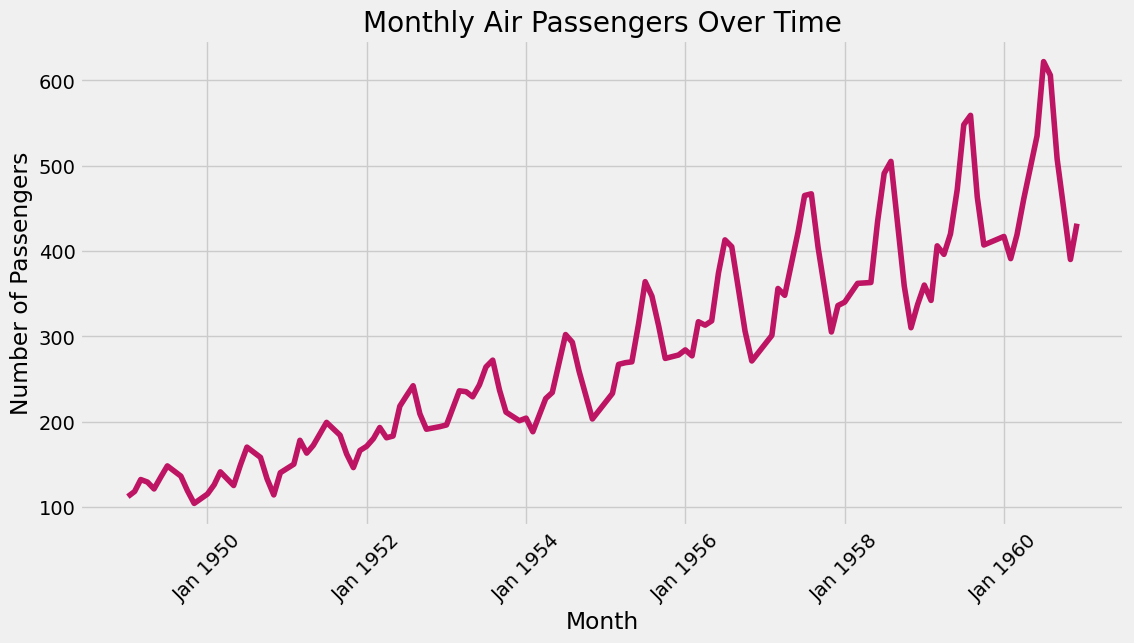

In [21]:
# Plotting the time series data
plt.figure(figsize=(12, 6))  # Create a figure with a specified size (12x6 inches)

# Plot the 'data' DataFrame (i.e., time series data) with a label for the legend and a specific line color
plt.plot(data, label='Monthly Passengers', color='#bd1463')  # Plot the time series of monthly passengers, with a pink color

# Set the title of the plot
plt.title('Monthly Air Passengers Over Time')  # Add a title to the plot

# Set the label for the x-axis
plt.xlabel('Month')  # Label for the x-axis (time period)

# Set the label for the y-axis
plt.ylabel('Number of Passengers')  # Label for the y-axis (number of passengers)

# Customize x-axis date formatting to show month and year (e.g., Jan 1949)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Use mdates.DateFormatter to format the dates on the x-axis

# Rotate the x-axis labels for better visibility (45 degrees)
plt.xticks(rotation=45)  # Rotate the x-axis tick labels to avoid overlap and improve readability

# Display the plot with all customizations
plt.show()  # Show the plot with the defined labels, title, and x-axis formatting

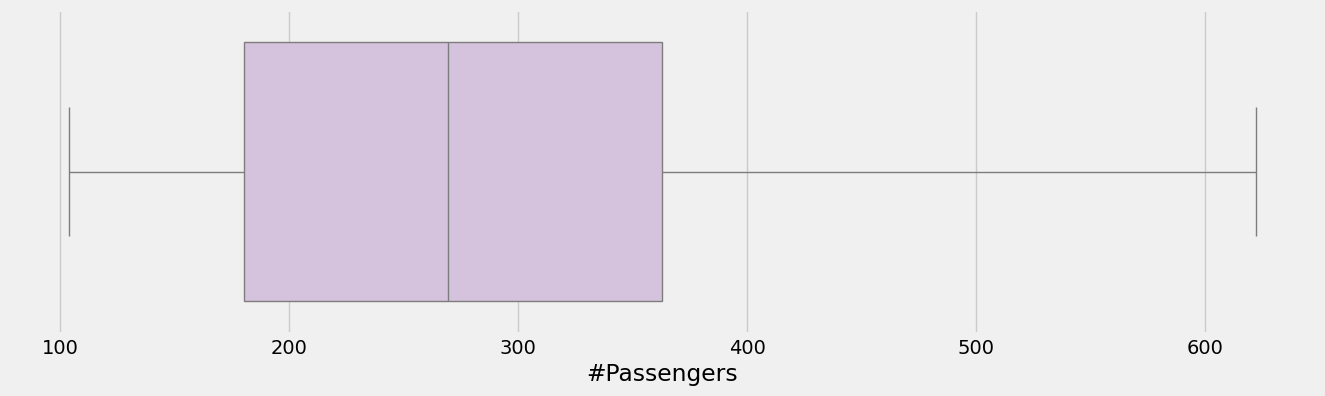

In [22]:
# Create a boxplot for the 'Passengers' column to visualize its distribution
plt.figure(figsize = (15, 4))  # Create a figure with size 15x4 inches (wider to accommodate the boxplot)

# Use seaborn's boxplot function to plot the 'Passengers' data
sns.boxplot(x=data['#Passengers'], color='#D7BDE2')  # Boxplot of 'Passengers' with a custom lavender color (#D7BDE2)

plt.show()  # Show the plot to visualize the distribution of the passenger numbers


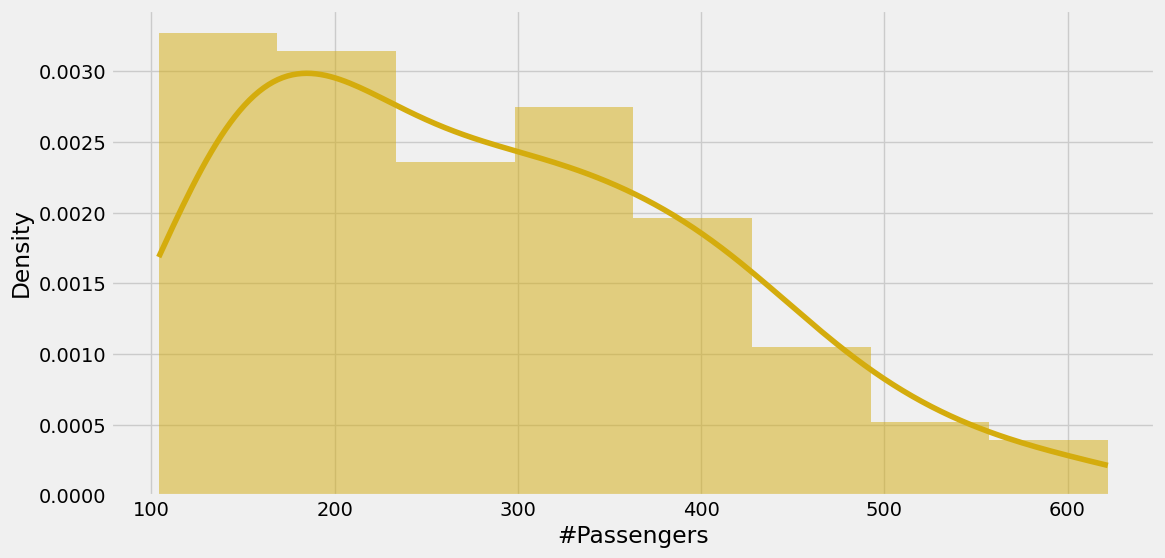

In [23]:
# Create a histogram with kernel density estimate (KDE) to visualize the distribution of 'Passengers'
plt.figure(figsize=(12,6)) # # Create a figure with size 12x6 inches (for better visibility)
# Use seaborn's histplot to plot the distribution of 'Passengers'
sns.histplot(data['#Passengers'],
            color='#D4AC0D',  # Set color of the histogram bars to a golden shade (#D4AC0D)
            label='100% Equities',  # Label for the histogram (if used in legend)
            kde=True,  # Add a Kernel Density Estimate (KDE) curve on top of the histogram
            stat='density',  # Normalize the histogram such that the area under the curve is 1 (density)
            linewidth=0)  # Remove the border line around the histogram bars
# Display the plot
plt.show()  # Show the plot to visualize the distribution of the 'Passengers' data with KDE


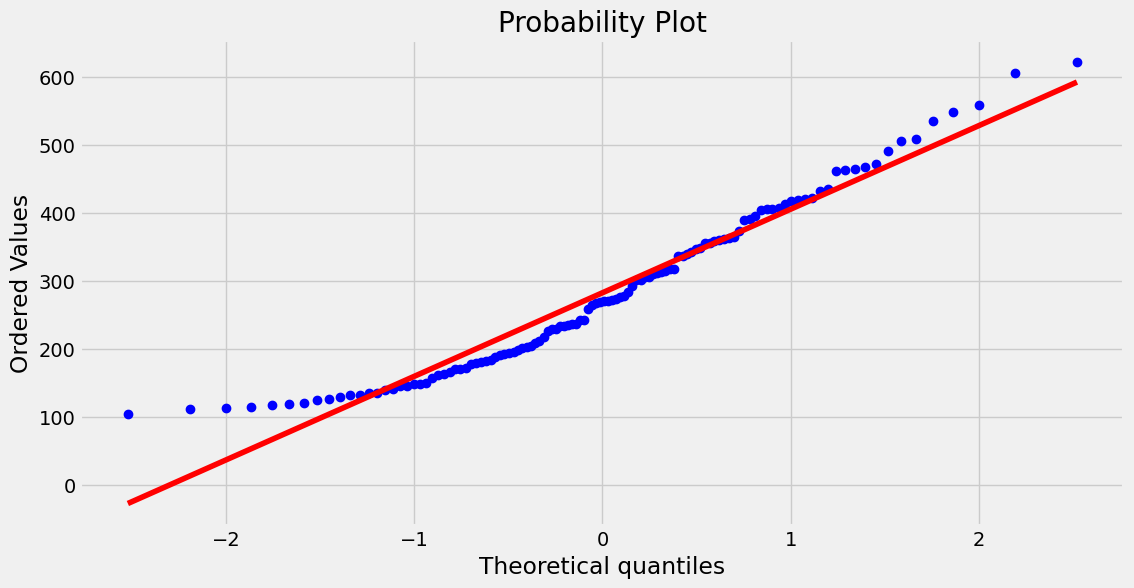

In [24]:
# generate a Q-Q Plot to assess the normality of the 'passengers' data
plt.figure(figsize=(12,6)) # Create a figure with size 12x6 inches for better visibility
# Use scipy's stats.probplot to create a Q-Q plot, which compares the data distribution to a normal distribution
stats.probplot(data['#Passengers'],
               plot=pylab)  # 'plot=pylab' will plot the Q-Q plot using pylab, a Matplotlib-like interface

# Display the plot
plt.show()  # Show the Q-Q plot to visualize how well the data fits a normal distribution

In [25]:
# Shapiro-Wilk Test
def shapiro_test(data):
    """
    Perform the Shapiro-Wilk test for normality.
    This test is used to check if the data follows a normal distribution.
    """
    # Perform the Shapiro-Wilk test, which returns the test statistic and p-value
    stat, p_value = stats.shapiro(data)

    # Output the results of the test
    print("Shapiro-Wilk Test:")
    print(f"Statistic: {stat}")  # Test statistic value
    print(f"P-value: {p_value}")  # P-value of the test

    # Check if the p-value is greater than 0.05, which means we fail to reject the null hypothesis (H₀)
    if p_value > 0.05:
        print("Result: The data looks normal (fail to reject H₀)\n")  # Data is normally distributed
    else:
        print("Result: The data does not look normal (reject H₀)\n")  # Data is not normally distrubuted

In [26]:
# Anderson-Darling Test
def anderson_test(data):
    """
    Perform the Anderson-Darling test for normality.
    This test is another method to assess whether data follows a normal distribution.
    """
    # Perform the Anderson-Darling test, specifying that the distribution is normal
    result = stats.anderson(data, dist='norm')

    # Output the results of the test
    print("Anderson-Darling Test:")
    print(f"Statistic: {result.statistic}")  # Test statistic
    print(f"Critical Values: {result.critical_values}")  # Critical values for different significance levels
    print(f"Significance Levels: {result.significance_level}")  # Corresponding significance levels

    # Compare the test statistic against the critical value at the 5% significance level
    if result.statistic < result.critical_values[2]:  # The critical value for 5% significance is at index 2
        print("Result: The data looks normal (fail to reject H₀)\n")  # Data is normally distributed
    else:
        print("Result: The data does not look normal (reject H₀)\n")  # Data is not normally distributed

In [27]:

# Kolmogorov-Smirnov Test
def ks_test(data):
    """
    Perform the Kolmogorov-Smirnov test for normality.
    This test compares the empirical distribution function of the data with the cumulative distribution function of a normal distribution.
    """
    # Perform the Kolmogorov-Smirnov test against a normal distribution
    stat, p_value = stats.kstest(data, 'norm')

    # Output the results of the test
    print("Kolmogorov-Smirnov Test:")
    print(f"Statistic: {stat}")  # Test statistic
    print(f"P-value: {p_value}")  # P-value

    # Check if the p-value is greater than 0.05, which means we fail to reject the null hypothesis (H₀)
    if p_value > 0.05:
        print("Result: The data looks normal (fail to reject H₀)\n")  # Data is normally distributed
    else:
        print("Result: The data does not look normal (reject H₀)\n")  # Data is not normally distributed


In [28]:
# Combine all three normality tests
def normality_tests(data):
    """
    Run all three normality tests: Shapiro-Wilk, Anderson-Darling, and Kolmogorov-Smirnov.
    """
    # Print a message indicating the start of the normality testing process
    print("Running Normality Tests...\n")

    # Run each of the three tests
    shapiro_test(data)  # Run Shapiro-Wilk test
    anderson_test(data)  # Run Anderson-Darling test
    ks_test(data)  # Run Kolmogorov-Smirnov test


# Call the normality_tests function with the data column '#Passengers' to run all tests
# Replace 'data['#Passengers']' with your actual dataset column
normality_tests(data['#Passengers'])

Running Normality Tests...

Shapiro-Wilk Test:
Statistic: 0.950389584080151
P-value: 0.0002629754650864336
Result: The data does not look normal (reject H₀)

Anderson-Darling Test:
Statistic: 1.5097523345121573
Critical Values: [0.558 0.636 0.763 0.889 1.058]
Significance Levels: [15.  10.   5.   2.5  1. ]
Result: The data does not look normal (reject H₀)

Kolmogorov-Smirnov Test:
Statistic: 1.0
P-value: 0.0
Result: The data does not look normal (reject H₀)



# **Time Series Decomposition to Analyze Trend, Seasonality and Noise**

--------------------------------------------------------------------------------------------------------------------------
                                                              Additive
-------------------------------------------------------------------------------------------------------------------------- 



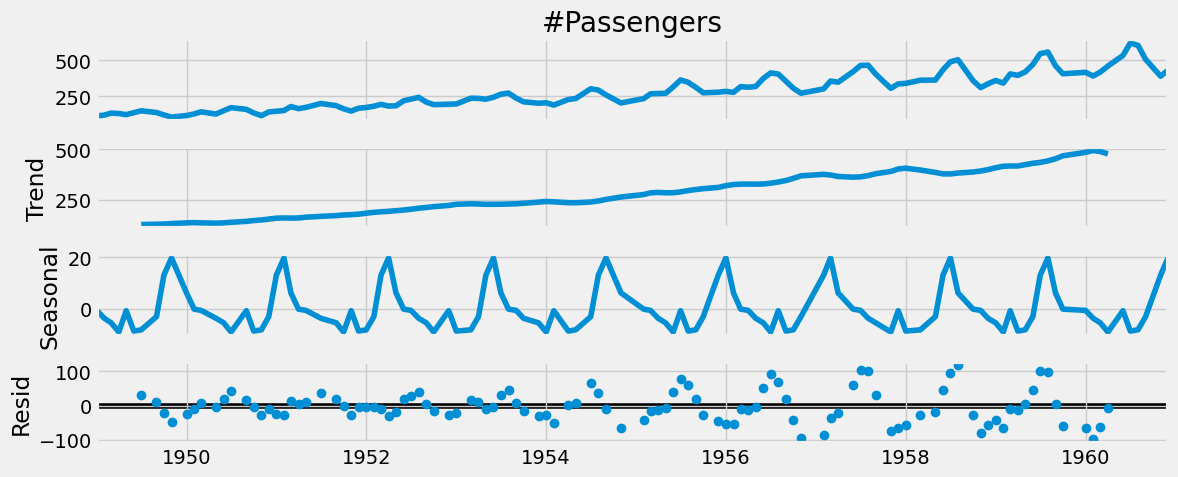

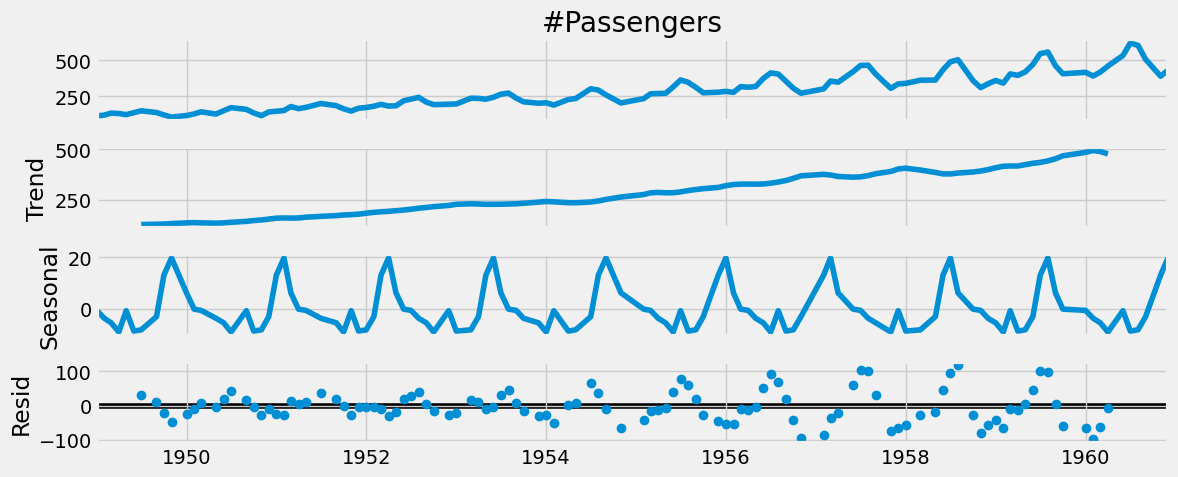

In [29]:
# Set the default figure size for the plots
plt.rcParams['figure.figsize'] = (12, 5)

# Print a header with dashes and a centered label 'Additive'
# The '-' symbol is used to create a separator line, and ' ' is used for centering the word 'Additive'
print('-' * 122)  # Print a line of dashes (122 dashes long)
print(' ' * 61, 'Additive')  # Print 'Additive' in the center
print('-' * 122, '\n')  # Print another line of dashes and add a newline for separation

# Perform the seasonal decomposition using an additive model
# The 'seasonal_decompose' function decomposes a time series into its components: trend, seasonal, and residuals.
# In this case, we are using the 'additive' model, which assumes that the components add together (i.e., Time series = Trend + Seasonality + Residuals)
# This function automatically plots the decomposition result, which includes the trend, seasonal, and residual components of the time series
sm.tsa.seasonal_decompose(data['#Passengers'], model='additive',period=12).plot()

--------------------------------------------------------------------------------------------------------------------------
                                                              Multiplicative
-------------------------------------------------------------------------------------------------------------------------- 



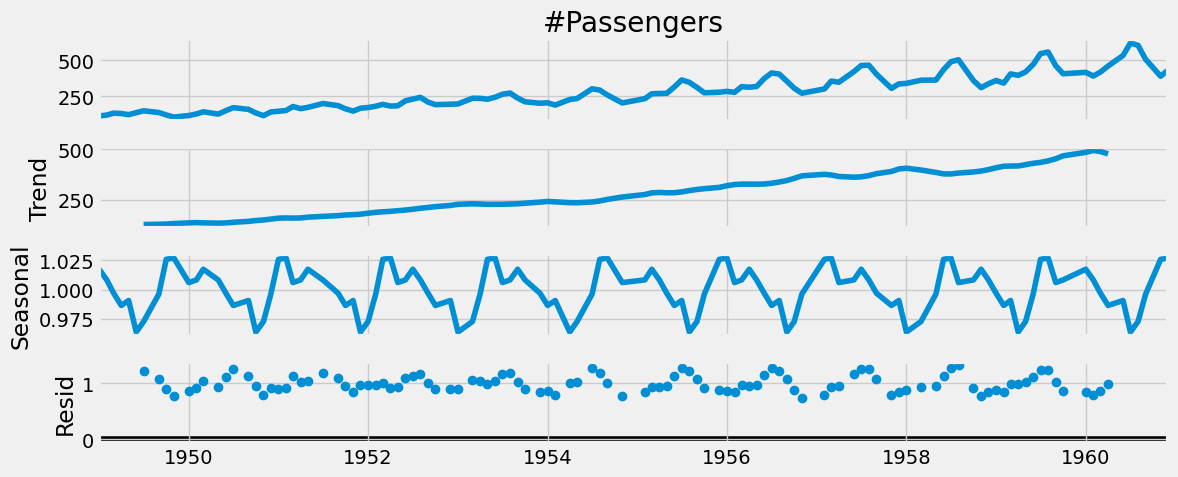

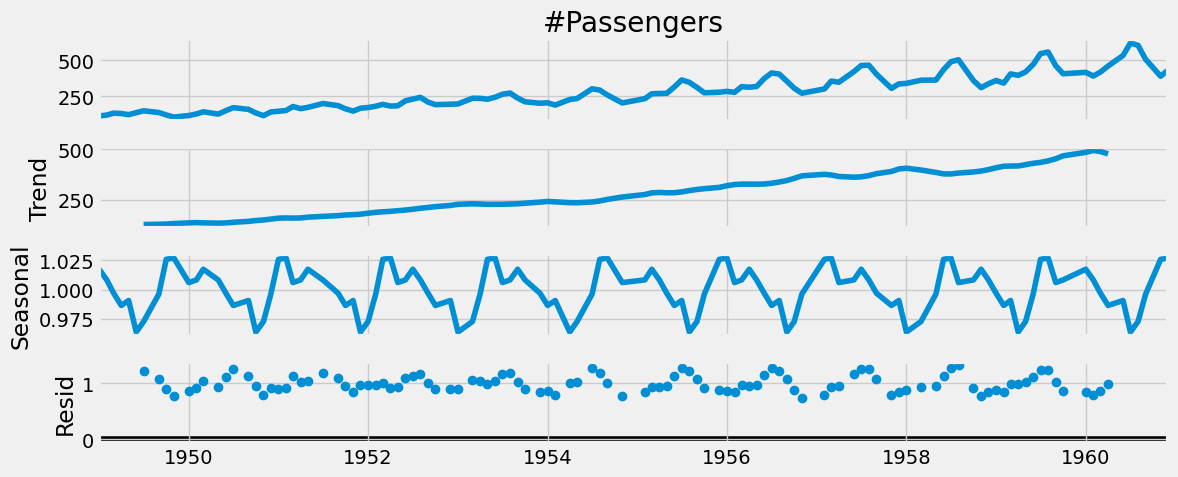

In [30]:
# Set the default figure size for the plots
plt.rcParams['figure.figsize'] = (12, 5)

# Print a header with dashes and a centered label 'Multiplicative'
# The '-' symbol is used to create a separator line, and ' ' is used for centering the word 'Multiplicative'
print('-' * 122)  # Print a line of dashes (122 dashes long)
print(' ' * 61, 'Multiplicative')  # Print 'Multiplicative' in the center
print('-' * 122, '\n')  # Print another line of dashes and add a newline for separation

# Perform the seasonal decomposition using a multiplicative model
# The 'seasonal_decompose' function decomposes a time series into its components: trend, seasonal, and residuals.
# In this case, we are using the 'multiplicative' model, which assumes that the components multiply together (i.e., Time series = Trend * Seasonality * Residuals)
# This function automatically plots the decomposition result, which includes the trend, seasonal, and residual components of the time series
sm.tsa.seasonal_decompose(data['#Passengers'], model='multiplicative',period=12).plot()

In [31]:
# Additive model decomposition
decomposition_additive = sm.tsa.seasonal_decompose(data, model='additive', period=12)
# The 'period=12' argument specifies that the seasonality is expected to repeat every 12 periods (e.g., monthly data with yearly seasonality).
# The model assumes the time series is the sum of trend, seasonal, and residual components.

# Log-likelihood for additive model
log_likelihood_additive = decomposition_additive.resid.dropna().sum()
# The 'decomposition_additive.resid' gives the residuals of the additive decomposition, which represent the noise after removing the trend and seasonality.
# 'dropna()' removes any missing values in the residuals, and '.sum()' calculates the sum of the residuals.

# Multiplicative model decomposition
decomposition_multiplicative = sm.tsa.seasonal_decompose(data, model='multiplicative', period=12)
# Similarly, the multiplicative model assumes the time series is the product of trend, seasonal, and residual components.

# Log-likelihood for multiplicative model
log_likelihood_multiplicative = decomposition_multiplicative.resid.dropna().sum()
# Same as the additive model, but for the multiplicative decomposition.

# Calculate AIC (Akaike Information Criterion) for both models (assuming normal residuals and simple models)
n = len(data)  # Number of observations in the dataset (total number of data points).
k = 2  # Number of parameters (in this case, we assume two components: trend and seasonality).

# Calculate AIC for both models (using log-likelihood approximation)
# AIC is a measure of the relative quality of a statistical model for a given dataset. Lower AIC values indicate a better fit.
# The formula for AIC is: AIC = 2k - 2 * log(L), where k is the number of parameters and log(L) is the log-likelihood.
AIC_additive = 2 * k - 2 * log_likelihood_additive
AIC_multiplicative = 2 * k - 2 * log_likelihood_multiplicative

# Print AIC for both models
print(f"AIC (Additive Model): {AIC_additive}")
print(f"AIC (Multiplicative Model): {AIC_multiplicative}")

AIC (Additive Model): 393.08584104937916
AIC (Multiplicative Model): -207.33147746633566


In [32]:
# Multiplicative Model (AIC = -207.33) has a much lower AIC than the Additive Model (AIC = 393.08).
# This suggests that the multiplicative model is a better fit for our data, as it has a more favorable AIC score.

Multiplicative models are often better when seasonal variations grow in magnitude as the level of the series increases (i.e., the seasonal fluctuations are proportional to the level of the data).
In our case, the multiplicative model seems to capture the seasonality and trend relationship more effectively, and the lower AIC suggests that it accounts for the data structure with a better balance of fit and model complexity.

## Data Stationarization ##

**What is Stationarity?**

Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,

a) It should have constant mean.

b) It should have constant variance or standard deviation.

c) Auto-covariance should not depend on time.

Trend & Seasonality are two reasons why a Time Series is not stationary & hence need to be corrected.

### **Tests to check if a series is stationary or not**

There are 2 ways to check for Stationarity of a TS:

a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.

b) ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a TS is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.

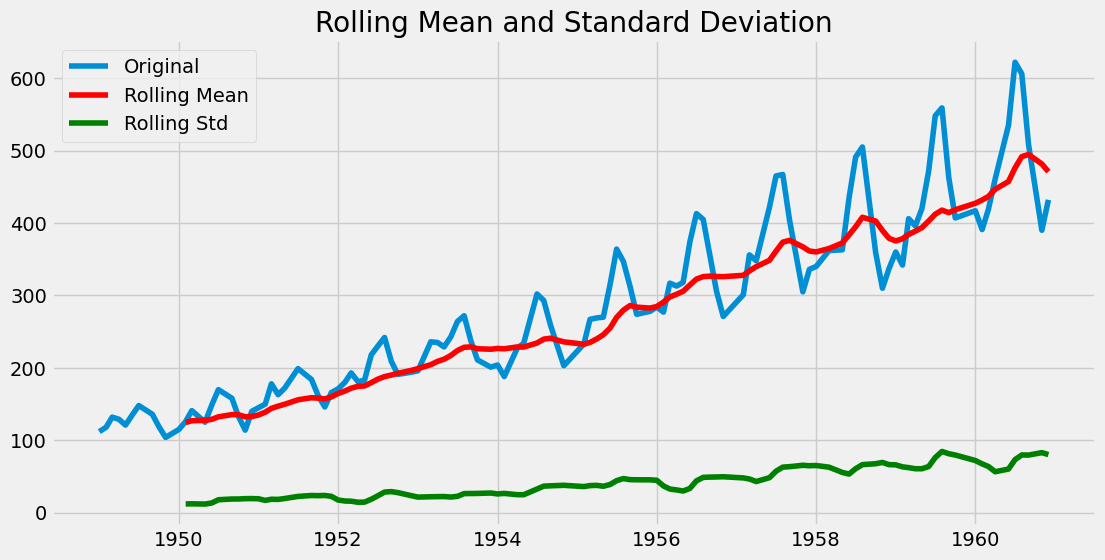

In [33]:
# Rolling mean and standard deviation
rolling_mean = data.rolling(window=12).mean()  # Calculate the rolling mean with a window size of 12 (e.g., 12 months).
rolling_std = data.rolling(window=12).std()  # Calculate the rolling standard deviation with a window size of 12.

# Plot rolling statistics
plt.figure(figsize=(12, 6))  # Set the figure size for the plot.
plt.plot(data, label='Original')  # Plot the original time series data.
plt.plot(rolling_mean, label='Rolling Mean', color='red')  # Plot the rolling mean in red.
plt.plot(rolling_std, label='Rolling Std', color='green')  # Plot the rolling standard deviation in green.
plt.title('Rolling Mean and Standard Deviation')  # Set the title of the plot.
plt.legend()  # Display the legend to label the lines.
plt.show()  # Display the plot

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the **Augmented Dickey-Fuller (ADF)** test.

In [34]:
# Augmented Dickey-Fuller (ADF) test function
def ADF(data):
    # Perform the Augmented Dickey-Fuller test
    result = adfuller(data)  # 'adfuller' returns multiple outputs: test statistic, p-value, number of lags used, and critical values.

    # Print ADF test results
    print(f'ADF Statistic: {result[0]}')  # Test statistic. If negative and large enough, it suggests stationarity.
    print(f'n_lags: {result[2]}')  # Number of lags used in the test.
    print(f'p-value: {result[1]:.20f}')  # p-value of the test. If less than 0.05, we reject the null hypothesis.

    # Print Critical Values
    print('Critical Values:')  # Critical values for different significance levels (1%, 5%, and 10%).
    for key, value in result[4].items():
        print(f'{key}: {value}')  # Print the critical values at different levels (1%, 5%, and 10%).

    # Interpretation of p-value
    if result[1] < 0.05:  # If the p-value is less than 0.05, the series is stationary (reject null hypothesis).
        print("\nConclusion: The series is stationary (reject the null hypothesis).")
    else:  # If the p-value is greater than 0.05, the series is not stationary (fail to reject null hypothesis).
        print("\nConclusion: The series is not stationary (fail to reject the null hypothesis).")

# Perform ADF test on the '#Passengers' column of the dataset
ADF(data['#Passengers'])  # Run the ADF test on the 'Passengers' column.

ADF Statistic: 1.0318616091317065
n_lags: 9
p-value: 0.99459100499589103705
Critical Values:
1%: -3.4924012594942333
5%: -2.8886968193364835
10%: -2.5812552709190673

Conclusion: The series is not stationary (fail to reject the null hypothesis).


Based-on adfuller: p-value = 0.99 (p-value > 0.05) --> H0 Accepted --> The data is non-stationary

In [35]:

# ACF and PACF function to plot both Autocorrelation and Partial Autocorrelation
def ACF_and_PACF(data):
    # Create a figure with a specific size (12x9 inches)
    fig = plt.figure(figsize=(12,9))

    # Add subplot for ACF (Autocorrelation Function)
    ax1 = fig.add_subplot(211)  # The '211' means 2 rows, 1 column, and 1st subplot.
    fig = plot_acf(data, lags=40, ax=ax1)  # Plot the ACF with 40 lags (number of time lags to display).

    # Add subplot for PACF (Partial Autocorrelation Function)
    ax2 = fig.add_subplot(212)  # The '212' means 2 rows, 1 column, and 2nd subplot.
    fig = plot_pacf(data, lags=40, ax=ax2)  # Plot the PACF with 40 lags (number of time lags to display)

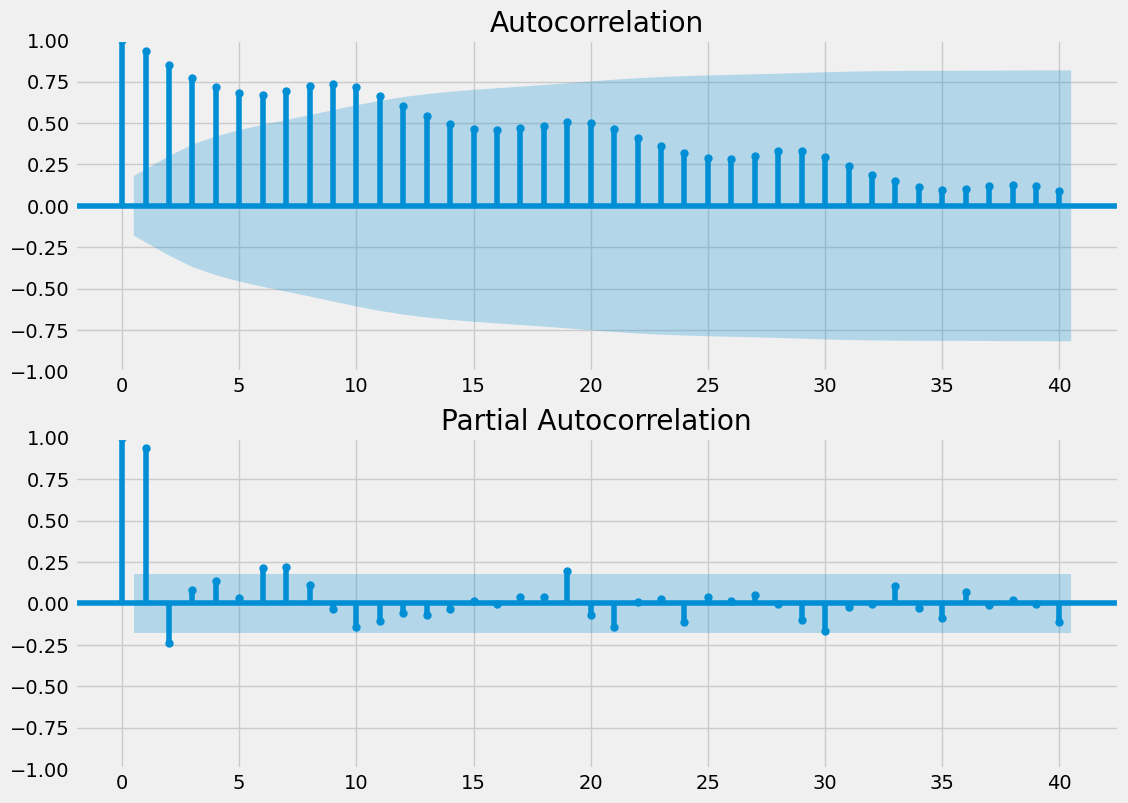

In [36]:
# Call the ACF_and_PACF function for the '#Passengers' column in the dataset
ACF_and_PACF(data['#Passengers'])

**ACF_and_PACF Function:**

The function ACF_and_PACF(data) is designed to generate two plots for time series analysis: the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF). These plots are commonly used in time series modeling, such as ARIMA, to help identify the AR (Autoregressive) and MA (Moving Average) components of the model.

ACF (Autocorrelation Function): This plot shows the correlation between the time series and its lagged values. It helps identify the presence of autocorrelation at various lags, which can indicate the need for an MA component in models like ARIMA.

PACF (Partial Autocorrelation Function): This plot shows the correlation between the time series and its lagged values after controlling for the correlations at shorter lags. It helps identify the AR component of a time series model.

Interpreting the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots is crucial for building and tuning time series models such as ARIMA. These plots help identify the underlying structure of your time series, particularly for determining the AR (Autoregressive) and MA (Moving Average) components. Here's how you can interpret these plots:

1. Autocorrelation Function (ACF) Plot: The ACF plot shows the correlation between a time series and its own lagged values at different lags.

Key Features to Look for in the ACF Plot:

Significant spikes: Look for spikes (bars) that extend beyond the confidence interval (usually shown as dashed lines). These indicate significant autocorrelations at the corresponding lag.
Decay pattern: The way the correlation decays as lags increase can suggest the type of model:
Slow decay: If the ACF plot shows a slow decay (gradual decline in correlation), it suggests that the series may require differencing to become stationary. It could indicate the presence of a trend in the data (non-stationarity).
Cut-off: If the ACF cuts off sharply after a certain lag, this indicates that a Moving Average (MA) process might be a good fit for the model. Specifically, the point at which the ACF cuts off suggests the order of the MA model (i.e., q in ARIMA(p,d,q)).
Sine-wave-like pattern: If the ACF shows a repetitive pattern, it may suggest seasonality in the data, and you might need to incorporate seasonal components (like SARIMA).
Example Interpretation of ACF Plot:

Significant correlation at lag 1 and then decay to zero: This suggests that a Moving Average (MA) model of order 1 (MA(1)) could be appropriate. You may not need higher-order MA terms if the correlation at higher lags falls inside the confidence interval.
Slow decay: If the ACF decays slowly and never reaches zero, this indicates that the series likely has a trend and is non-stationary, meaning that differencing might be required before modeling.

2. Partial Autocorrelation Function (PACF) Plot: The PACF plot shows the partial correlation between the time series and its lagged values, after removing the influence of earlier lags. This is useful for identifying the AR (Autoregressive) component of a time series model.

Key Features to Look for in the PACF Plot:

Significant spikes: Look for spikes that extend beyond the confidence interval. These indicate a direct relationship at the corresponding lag.
Cut-off: The lag where the PACF cuts off (where the bars fall within the confidence interval) indicates the order of the AR process.
Sharp cut-off after a certain lag: A sharp cut-off suggests an Autoregressive (AR) process. Specifically, the number of significant lags before the cut-off suggests the order of the AR model (i.e., p in ARIMA(p,d,q)).
Example Interpretation of PACF Plot:

Significant spike at lag 1 and then cut-off: This suggests an AR(1) model, meaning the best model might involve a single lag of past values to predict future values.
Significant spikes at several lags: If the PACF shows significant spikes at multiple lags (e.g., at lags 1, 2, and 3), you might have a higher-order AR process (e.g., AR(3)).
No significant spikes: If there are no significant spikes beyond lag 0, it suggests that the data might be better modeled using only MA terms or no AR component.
Combined ACF and PACF Analysis:

ACF and PACF for ARIMA Models:
ARIMA(p, d, q):
ACF helps to identify q, the order of the MA process.
PACF helps to identify p, the order of the AR process.
ARIMA(p, d, q) Model Rules:
If ACF cuts off sharply and PACF decays slowly: Likely a MA model (q terms).
If PACF cuts off sharply and ACF decays slowly: Likely an AR model (p terms).
If both ACF and PACF decay slowly: This suggests that differencing is needed (and possibly seasonal components if the decay follows a sine wave or repeats in a cyclical pattern).
Example Scenarios: Let’s say you have the following two plots:

1. ACF shows a sharp cut-off after lag 1, and PACF decays slowly:

This suggests an MA(1) model, meaning the time series has significant autocorrelation at lag 1, but the correlation at subsequent lags is negligible.
2. PACF shows a sharp cut-off after lag 2, and ACF decays slowly:

This suggests an AR(2) model, meaning that the time series has a significant autoregressive relationship with its first two lags.
3. ACF and PACF both show a slow decay:

This indicates a non-stationary series that likely requires differencing (i.e., to make the series stationary) before applying ARIMA.

Summary of What to Look for in ACF and PACF:

Pattern         -               	     Model Implication
ACF cuts off sharply, PACF decays slowly -	Likely a MA model (Moving Average). Check the ACF for the number of significant lags (q).

PACF cuts off sharply, ACF decays slowly	-Likely an AR model (Autoregressive). Check the PACF for the number of significant lags (p).

Both ACF and PACF decay slowly	- Differencing is likely required to make the series stationary.

Sine wave pattern in ACF and PACF- Seasonality present, suggesting a seasonal model (e.g., SARIMA).

**Non-stationary Elimination:**

In this time series, we have seasonal components and non-constant variance and mean. To eliminate these non-stationary, we do the following:

1.Elimination of non-constant variance (Heteroscedasticity)

2.Elimination of seasonal components

3.Elimination of non-constant mean (Trend)

**Elimination of non-constant variance (Heteroscedasticity)**

The Box-Cox transformation is a family of power transformations that are used to stabilize variance and make data more normally distributed. It is particularly useful when the data shows non-constant variance (heteroscedasticity), as it can reduce the effect of large fluctuations and make the series more stationary.

The goal of the transformation is to make the variance of the data more constant (homoscedastic), which is one of the key assumptions for time series models like ARIMA.

In [37]:
# Perform Box-Cox Transformation
fitted_data, fitted_lambda = stats.boxcox(data['#Passengers'])  # Apply Box-Cox transformation

# Print the lambda value used for the transformation
print('-'*50)
print(' '*5,'fitted_lambda is: ', fitted_lambda)  # Output the fitted lambda value
print('-'*50,'\n')

--------------------------------------------------
      fitted_lambda is:  0.15039543061939728
-------------------------------------------------- 



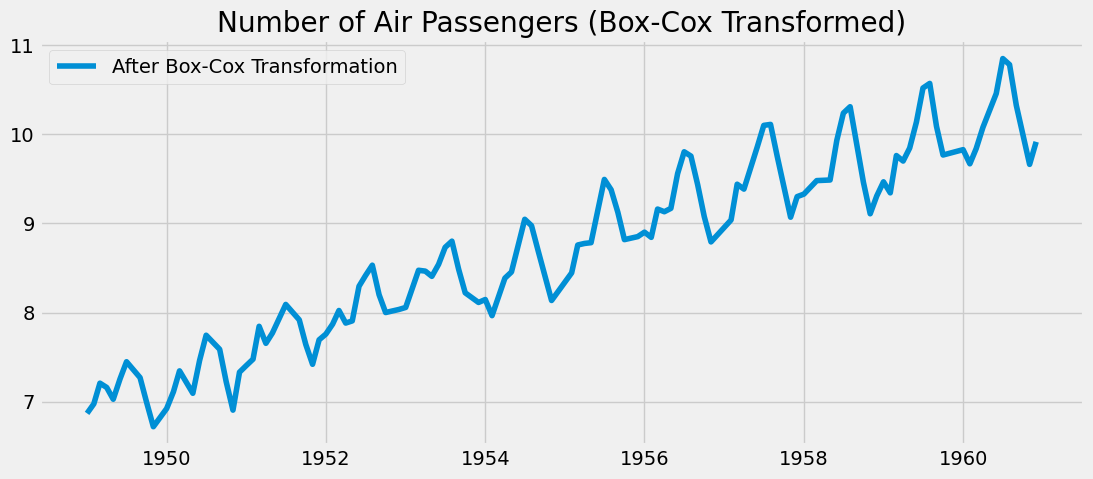

In [38]:
# Create a new Series for the transformed data with the same index as the original data
data_boxcox = pd.Series(boxcox(data['#Passengers'], fitted_lambda), index=data.index)

# Plot the transformed data (after Box-Cox transformation)
plt.plot(data_boxcox, label='After Box-Cox Transformation')
plt.legend()  # Show legend
plt.title('Number of Air Passengers (Box-Cox Transformed)')  # Title of the plot
plt.show()  # Display the plot

In [39]:
ADF(data_boxcox)  # Perform ADF test on the transformed data

ADF Statistic: -0.819992451456496
n_lags: 9
p-value: 0.81317878444707425434
Critical Values:
1%: -3.4924012594942333
5%: -2.8886968193364835
10%: -2.5812552709190673

Conclusion: The series is not stationary (fail to reject the null hypothesis).


#aashhj**Elimination seasonal components with differencing**

In this step, we apply differencing to the Box-Cox transformed time series data to remove seasonality. Differencing is a common technique used in time series analysis to remove trends and seasonality, making the data more stationary.

Seasonal differencing is applied by subtracting the value of the time series from the value 12 months earlier. Specifically, it uses .shift(periods=12) to shift the time series by 12 periods (12 months for monthly data) and subtracts the shifted data from the original data.

In [40]:
# Apply differencing to the Box-Cox transformed data (12 periods lag)
data_boxcox_diff_12=pd.Series(data_boxcox-data_boxcox.shift(periods=12),index=data.index)

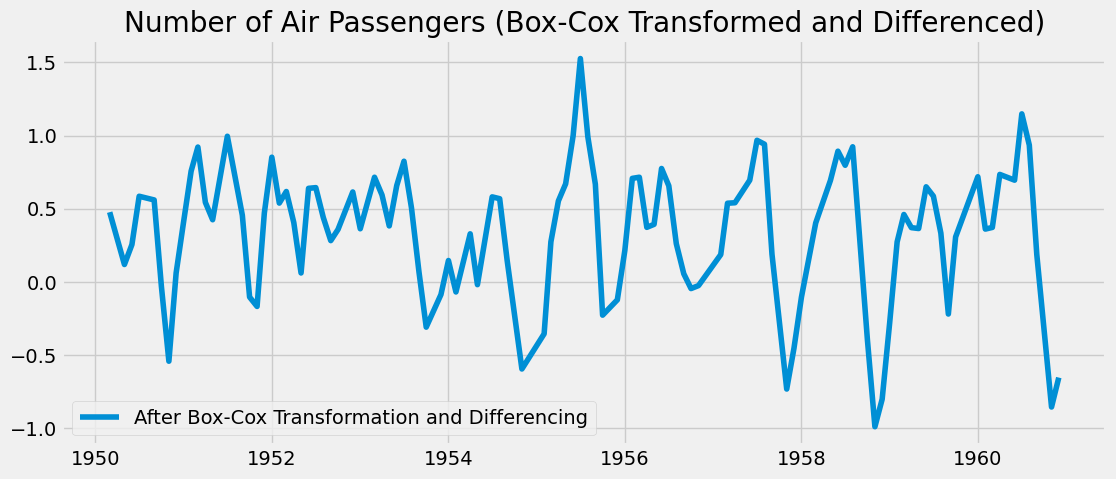

In [41]:
#Drop missing values after differencing
data_boxcox_diff_12.dropna(inplace=True)

# Plot the differenced data
plt.plot(data_boxcox_diff_12, label='After Box-Cox Transformation and Differencing')  # Plot transformed and differenced data
plt.legend()  # Show legend
plt.title('Number of Air Passengers (Box-Cox Transformed and Differenced)')  # Title of the plot
plt.show()  # Display the plot

In [42]:
ADF(data_boxcox_diff_12)

ADF Statistic: -3.033704915306643
n_lags: 13
p-value: 0.03186443503510081460
Critical Values:
1%: -3.503514579651927
5%: -2.893507960466837
10%: -2.583823615311909

Conclusion: The series is stationary (reject the null hypothesis).


**Elimination non-constant mean with differencing (Trend)**


In this step, we use second-order differencing to remove the non-constant mean (i.e., the trend) from the time series data. This process helps in making the data stationary by eliminating any trend present in the series.

Now, second-order differencing is applied to remove the trend from the data. The first-order differenced data (data_boxcox_diff_12) is differenced again by subtracting the previous value (with .shift()), which removes the trend component.

In [43]:
# Apply second-order differencing to the previously differenced Box-Cox transformed data
data_boxcox_second_order_diff = pd.Series(data_boxcox_diff_12 - data_boxcox_diff_12.shift(),index=data.index)
#Drop missing values after scond-order differencing
data_boxcox_second_order_diff.dropna(inplace=True)

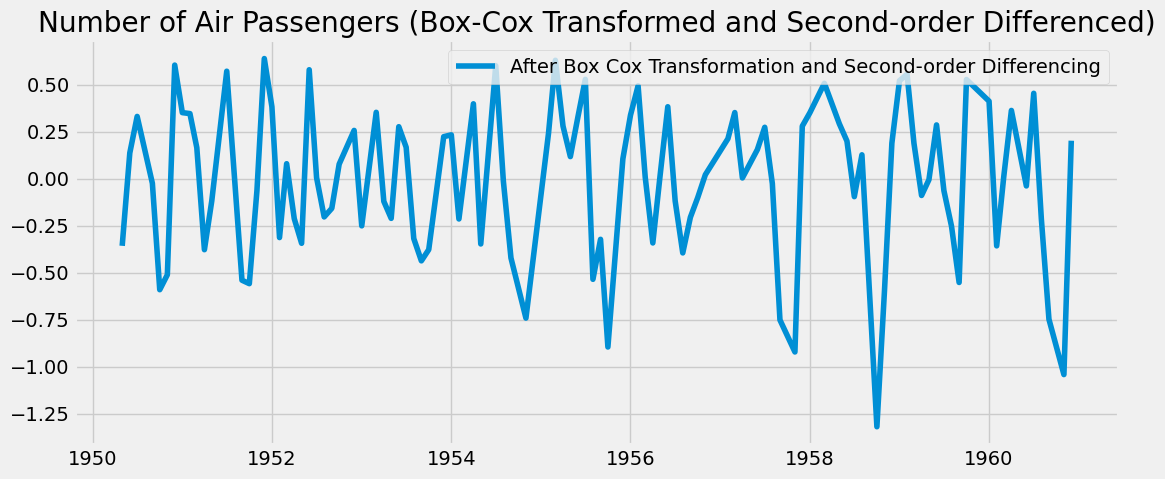

In [44]:
# Plot the second-order differenced data
plt.plot(data_boxcox_second_order_diff,label='After Box Cox Transformation and Second-order Differencing') #Plot second-order differenced data
plt.legend(loc='upper right') #Show legend in the upper-right corner
plt.title('Number of Air Passengers (Box-Cox Transformed and Second-order Differenced)')# Plot second-order differenced data
plt.show()

In [45]:
ADF(data_boxcox_second_order_diff)

ADF Statistic: -3.4598387820161776
n_lags: 12
p-value: 0.00908045015637084715
Critical Values:
1%: -3.503514579651927
5%: -2.893507960466837
10%: -2.583823615311909

Conclusion: The series is stationary (reject the null hypothesis).


In [46]:
#Based-on adfuller: p-value < 0.05 --> H0 Reject --> The data is stationary

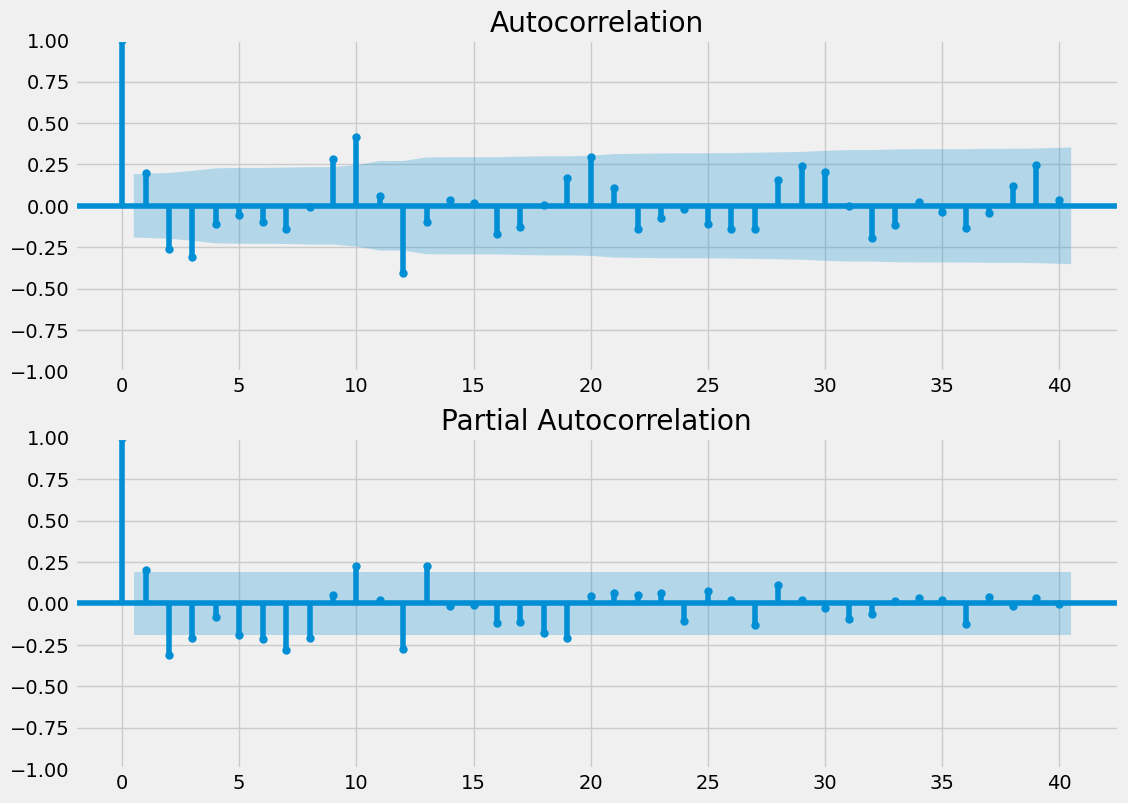

In [47]:
#ACF_and_PACF fucntion for the scond-order differenced Box-Cox transformed data
ACF_and_PACF(data_boxcox_second_order_diff)

# **Train-Test Split for Time Series Forecasting**

This code splits the time series data (data_boxcox_second_order_diff) into two parts: a training set and a test set. The training set is used to build the forecasting model, while the test set evaluates the model's performance on unseen data.

In [48]:
# Define the training data size (80% of the total dataset)
num_train = math.floor(len(data['#Passengers']) * 0.8) #Original Dataset

# Split the original data into training and testing sets
train, test = data[:num_train], data[num_train:]  # 80% train, 20% test

# Split the transformed Box-Cox and differenced data
train_data, test_data = data_boxcox_second_order_diff[:num_train], data_boxcox_second_order_diff[num_train:] #Transformed Dataset

In [49]:
len(data['#Passengers'])

118

In [50]:
train_data.head(), test_data.head()

(Month
 1950-05-01   -0.357770
 1950-06-01    0.136183
 1950-07-01    0.330473
 1950-09-01   -0.025282
 1950-10-01   -0.591163
 Name: #Passengers, dtype: float64,
 Month
 1959-10-01    0.526888
 1960-01-01    0.411649
 1960-02-01   -0.357885
 1960-03-01    0.011388
 1960-04-01    0.362407
 Name: #Passengers, dtype: float64)

In [51]:
train.shape,test.shape

((94, 1), (24, 1))

In [52]:
train_data.head()

,#Passengers
Month,
1950-05-01,-0.357770
1950-06-01,0.136183
1950-07-01,0.330473
1950-09-01,-0.025282
1950-10-01,-0.591163


## **Autoregressive Model (AR)**

**What is the ARIMA Model?**

ARIMA (AutoRegressive Integrated Moving Average) is a time series forecasting model that combines AutoRegressive (AR) and Moving Average (MA) components with differencing (I) to make the series stationary.

**It has three key hyperparameters:**

P (AutoRegressive lags) – Determines the correlation between past and present values.

D (Order of Differentiation) – Helps make the time series stationary.

Q (Moving Average lags) – Helps smooth out noise by considering past forecast errors.

The AR component captures the relationship between past and present values, while the MA component smooths out fluctuations. The I (Integrated) part helps bridge these two components by ensuring stationarity.

**How to Determine P & Q for ARIMA?**

To find the values of P and Q, we use ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots:

PACF plot → Helps determine P (number of AR lags).
ACF plot → Helps determine Q (number of MA lags).

**Method:**

Identify the first point where the PACF graph drops to zero → This gives P.

Identify the first point where the ACF graph drops to zero → This gives Q.

In [53]:
# Define the AR model using ARIMA (p=12, d=0, q=0)
# - p=12 (AutoRegressive lags)
# - d=0 (No differencing, assuming data is already stationary)
# - q=0 (No Moving Average component)
model_ar = ARIMA(train_data, order=(12, 0, 0))
# Fit the AR model to the training data
model_fit_ar = model_ar.fit()

# Display the model summary
print(model_fit_ar.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                   94
Model:                ARIMA(12, 0, 0)   Log Likelihood                 -10.650
Date:                Sun, 09 Mar 2025   AIC                             49.301
Time:                        16:31:25   BIC                             84.907
Sample:                             0   HQIC                            63.683
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.008     -0.054      0.957      -0.017       0.016
ar.L1         -0.1333      0.121     -1.101      0.271      -0.371       0.104
ar.L2         -0.3793      0.135     -2.809      0.0

In [54]:
# Obtain the fitted values (predicted values on training data) from the ARIMA model
pred_AR_diff = pd.Series(model_fit_ar.fittedvalues, copy=True)

# Reverse the differencing step by computing the cumulative sum
pred_AR_diff_cumsum = pred_AR_diff.cumsum()

# Reconstruct the Box-Cox transformed series before differencing
pred_AR_boxcox = pd.Series(data_boxcox.iloc[0], index=data_boxcox.index)  # Initialize with the first value
pred_AR_boxcox = pred_AR_boxcox.add(pred_AR_diff_cumsum, fill_value=0)  # Restore differenced values

# Apply inverse Box-Cox transformation to obtain predictions in the original scale
pred_AR = inv_boxcox(pred_AR_boxcox, fitted_lambda)

# Display the first few predicted values
pred_AR.head()

,0
Month,
1949-01-01,112.0
1949-02-01,112.0
1949-03-01,112.0
1949-04-01,112.0
1949-05-01,112.0


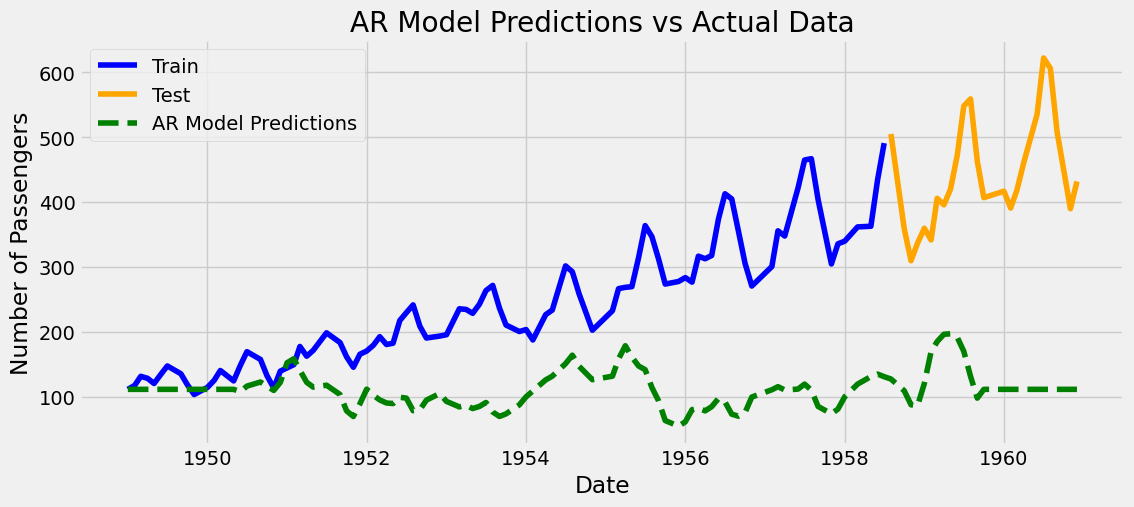

In [55]:
# Plot the original training data ('#Passengers')
plt.plot(train.index, train['#Passengers'], label='Train', color='blue')

# Plot the original test data ('#Passengers')
plt.plot(test.index, test['#Passengers'], label='Test', color='orange')

# Plot the AR model predictions on the original scale, ensuring alignment with the test set
plt.plot(pred_AR.index, pred_AR, label='AR Model Predictions', color='green', linestyle='dashed')

# Add legend to differentiate the plotted lines
plt.legend()

# Add title and axis labels
plt.title('AR Model Predictions vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')

# Display the plot
plt.show()

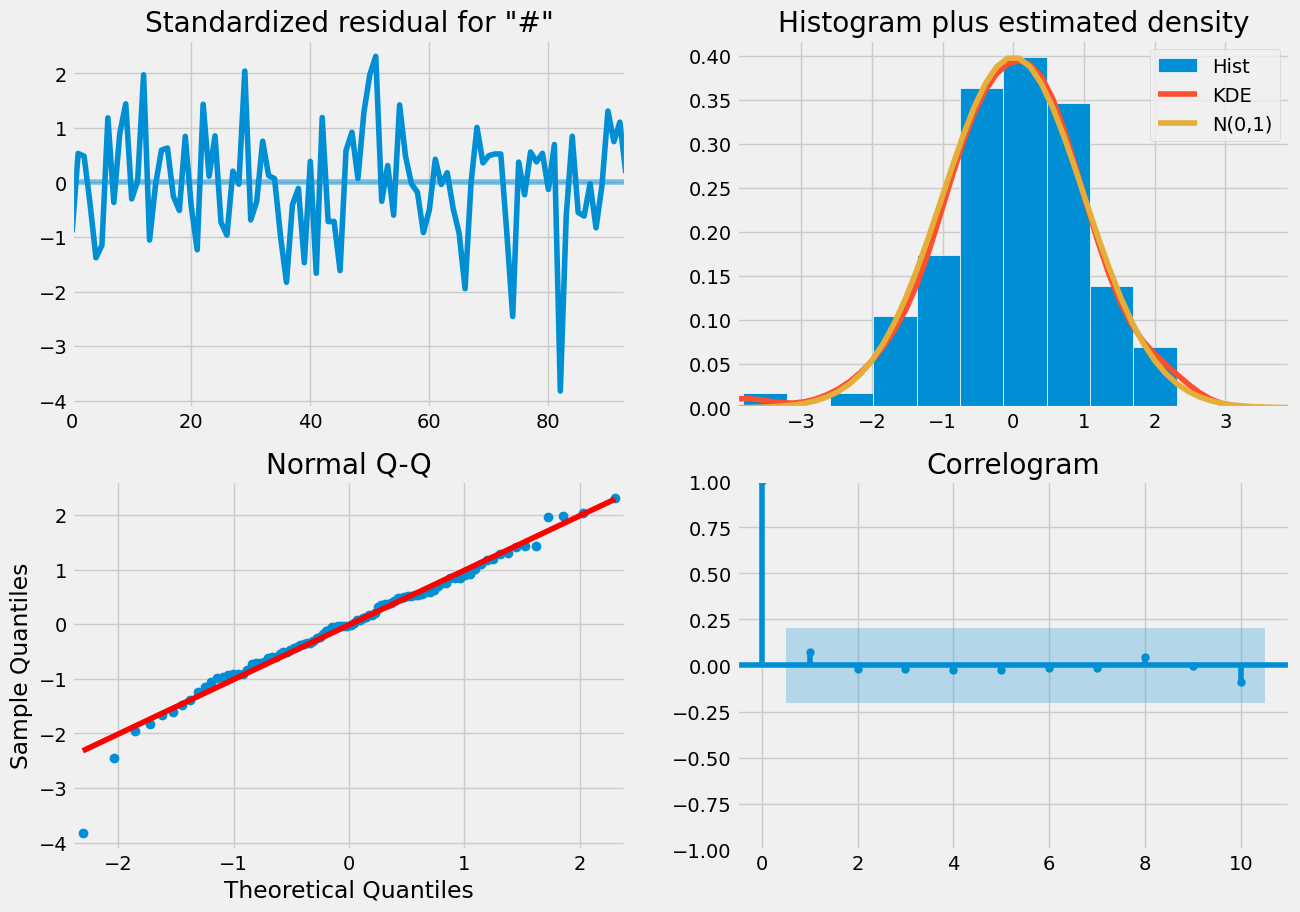

In [56]:
# Generate diagnostic plots for the ARIMA model
x=model_fit_ar.plot_diagnostics(figsize=(14, 10))

# `plot_diagnostics` generates four diagnostic plots:
# 1. Standardized residuals over time - Checks for patterns or non-stationarity.
# 2. Histogram plus KDE plot - Assesses the normality of residuals.
# 3. Q-Q plot - Compares residuals against a normal distribution.
# 4. Correlogram (ACF plot) - Checks for autocorrelation in residuals.

In [57]:
# Ensure that the prediction corresponds to the test set only
# Extract the portion of `pred_AR` that matches the test set's index
pred_AR_test = pred_AR[test.index]

# Calculate MSE and MAE using only the test data and the corresponding predictions
mse_test_AR = mean_squared_error(test['#Passengers'], pred_AR_test)
mae_test_AR = mean_absolute_error(test['#Passengers'], pred_AR_test)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE) for Test Set: {mse_test_AR:.4f}')
print(f'Mean Absolute Error (MAE) for Test Set: {mae_test_AR:.4f}')

Mean Squared Error (MSE) for Test Set: 107092.9268
Mean Absolute Error (MAE) for Test Set: 314.8602


# **Autoregressive Moving Average (ARMA) Model: Building and Evaluation**

In [58]:
# Define and fit an ARMA(6,6) model (ARIMA with d=0)
model_arma = ARIMA(train_data, order=(6, 0, 6))  # AR(6) + MA(6), no differencing
model_fit_arma = model_arma.fit()  # Fit the model to training data

# Display the summary of the fitted ARMA model
print(model_fit_arma.summary())  # Print model details and diagnostics

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                   94
Model:                 ARIMA(6, 0, 6)   Log Likelihood                 -12.897
Date:                Sun, 09 Mar 2025   AIC                             53.794
Time:                        16:31:27   BIC                             89.400
Sample:                             0   HQIC                            68.177
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.002     -0.945      0.345      -0.007       0.002
ar.L1          0.3066      0.232      1.322      0.186      -0.148       0.761
ar.L2         -0.0577      0.216     -0.267      0.7

In [59]:
# Generate the fitted values (predicted values on training data) from the ARMA model
pred_ARMA_fitted = pd.Series(model_fit_arma.fittedvalues, copy=True)

# Compute the cumulative sum of the fitted values (reversing differencing effect if applied)
pred_ARMA_cumsum = pred_ARMA_fitted.cumsum()

# Create a new series to reconstruct the Box-Cox transformed data
pred_ARMA_boxcox = pd.Series(data_boxcox,index =data_boxcox.index)

# Add the cumulative sum of the fitted values to the Box-Cox transformed series
pred_ARMA_boxcox = pred_ARMA_boxcox.add(pred_ARMA_cumsum, fill_value=0)

# Apply the inverse Box-Cox transformation to get predictions in the original scale
pred_ARMA = inv_boxcox(pred_ARMA_boxcox, fitted_lambda)

# Display the first few predicted values
pred_ARMA.head()

,0
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


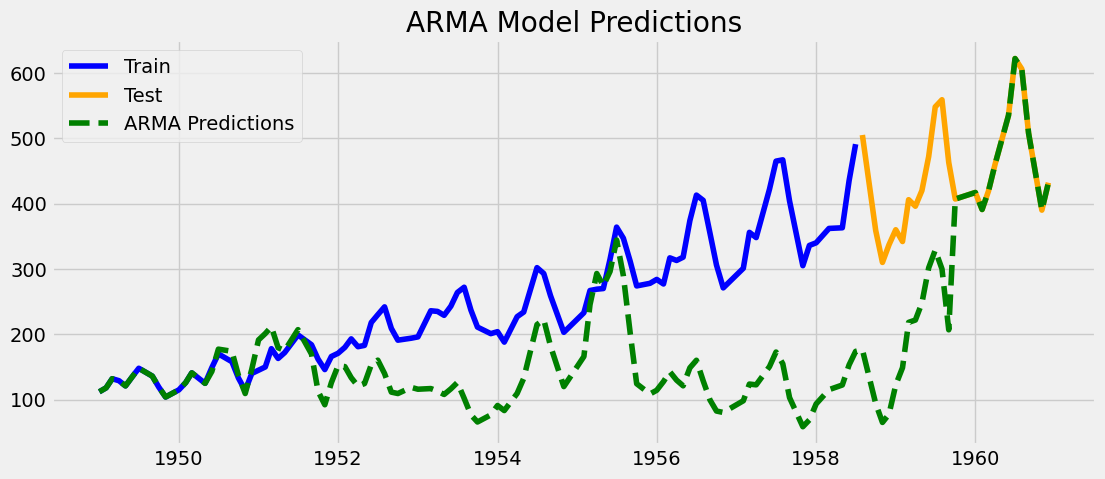

In [60]:
# Plot the training data series
plt.plot(train.index, train['#Passengers'], label='Train', color='blue')
# `train.index` ensures correct alignment on the x-axis.

# Plot the test data series
plt.plot(test.index, test['#Passengers'], label='Test', color='orange')
# `test.index` ensures the test data aligns correctly on the x-axis.

# Plot the predictions of the ARMA model
plt.plot(pred_ARMA.index, pred_ARMA, label='ARMA Predictions', color='green', linestyle='dashed')
# Ensure `pred_ARMA.index` is aligned correctly.
# Use `linestyle='dashed'` to visually differentiate predictions.

# Add a legend to differentiate between the data series and the model predictions
plt.legend()

# Set the title for the plot
plt.title('ARMA Model Predictions')

# Display the plot
plt.show()

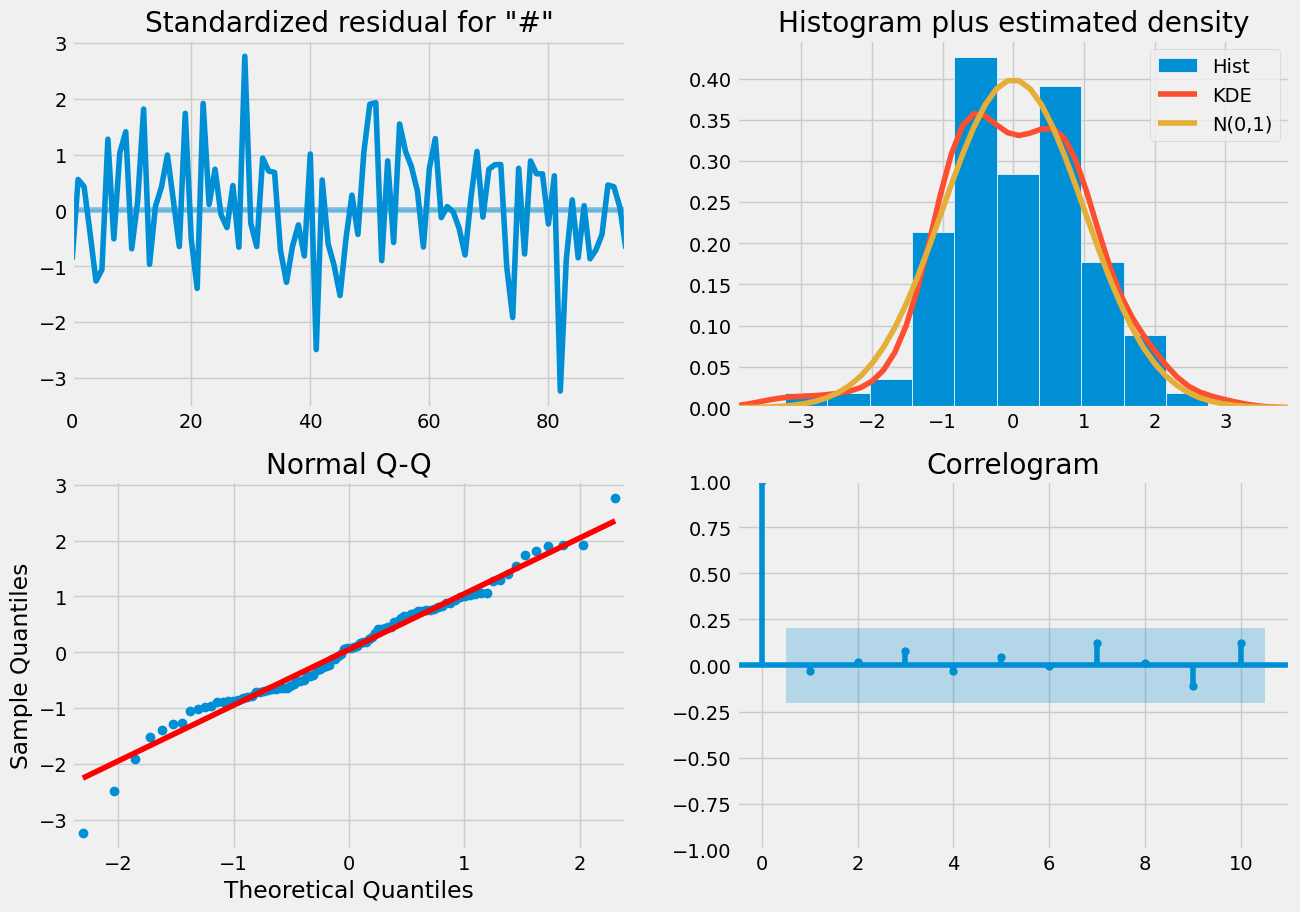

In [61]:
# Generate diagnostic plots for the ARMA model to assess residuals and model performance
fig = model_fit_arma.plot_diagnostics(figsize=(14, 10))

# `plot_diagnostics()` generates four key diagnostic plots:
# 1. **Standardized Residuals**: Checks if residuals show random patterns (no trends or seasonality).
# 2. **Histogram plus KDE Plot**: Assesses whether residuals follow a normal distribution.
# 3. **QQ-Plot (Quantile-Quantile Plot)**: Compares residuals to a normal distribution to detect deviations.
# 4. **Correlogram (ACF of Residuals)**: Checks for autocorrelation in residuals; significant values indicate model misspecification.

plt.show()

In [62]:
# Ensure that the predictions correspond only to the test set
# Extract the portion of `pred_ARMA` that matches the test set's index
pred_ARMA_test = pred_ARMA.loc[test.index]

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse_test_ARMA = mean_squared_error(test['#Passengers'], pred_ARMA_test)
mae_test_ARMA = mean_absolute_error(test['#Passengers'], pred_ARMA_test)

# Print the error metrics
print(f'Mean Squared Error (MSE) for Test Set: {mse_test_ARMA:.2f}')
print(f'Mean Absolute Error (MAE) for Test Set: {mae_test_ARMA:.2f}')

Mean Squared Error (MSE) for Test Set: 29334.38
Mean Absolute Error (MAE) for Test Set: 123.63


# **ARIMA Model Building and Evaluation**

In [63]:
# Fit an ARIMA model with order (6,1,6) to the training data
model_arima = ARIMA(train_data, order=(6,1,6))
# (p=6, d=1, q=6) -> Includes differencing (d=1) to handle non-stationarity

# Fit the ARIMA model
model_fit_arima = model_arima.fit()

# Display the summary of the fitted ARIMA model
print(model_fit_arima.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                   94
Model:                 ARIMA(6, 1, 6)   Log Likelihood                 -25.119
Date:                Sun, 09 Mar 2025   AIC                             76.237
Time:                        16:31:29   BIC                            109.161
Sample:                             0   HQIC                            89.531
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6378      0.262     -2.434      0.015      -1.151      -0.124
ar.L2         -0.6146      0.268     -2.297      0.022      -1.139      -0.090
ar.L3         -0.7855      0.314     -2.501      0.0

In [64]:
# Generate the fitted values (predicted values on training data) from the ARIMA model
pred_ARIMA_fitted = pd.Series(model_fit_arima.fittedvalues, copy=True)

# Compute the cumulative sum of the fitted values (reversing differencing effect if applied)
pred_ARIMA_cumsum = pred_ARIMA_fitted.cumsum()

# Create a new series to reconstruct the Box-Cox transformed data
pred_ARIMA_boxcox = pd.Series(data_boxcox, index=data_boxcox.index)

# Add the cumulative sum of the fitted values to the Box-Cox transformed series
pred_ARIMA_boxcox = pred_ARIMA_boxcox.add(pred_ARIMA_cumsum, fill_value=0)

# Apply the inverse Box-Cox transformation to get predictions in the original scale
pred_ARIMA = inv_boxcox(pred_ARIMA_boxcox, fitted_lambda)

# Display the first few predicted values
pred_ARIMA.head()

,0
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


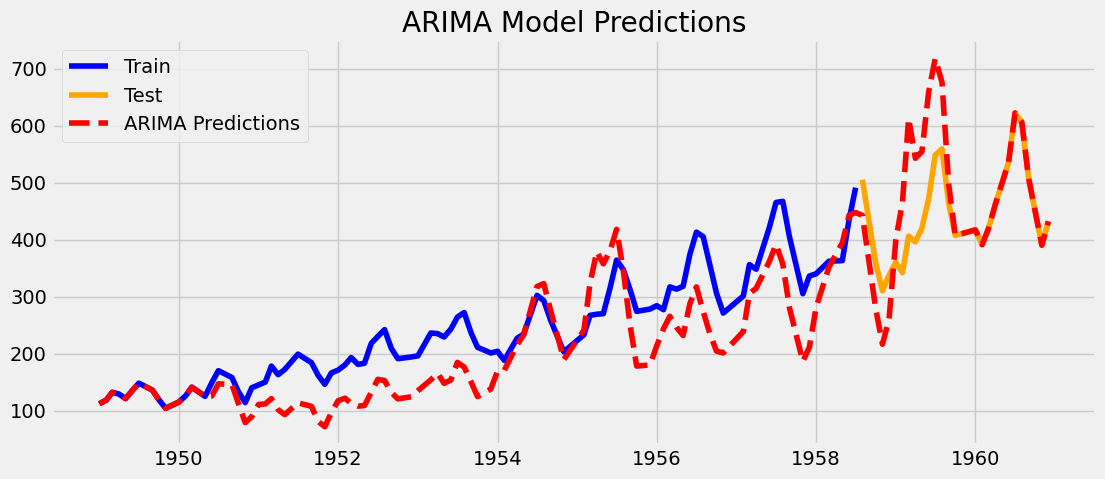

In [65]:
# Plot the training data series
plt.plot(train.index, train['#Passengers'], label='Train', color='blue')
# `train.index` ensures correct alignment on the x-axis.

# Plot the test data series
plt.plot(test.index, test['#Passengers'], label='Test', color='orange')
# `test.index` ensures the test data aligns correctly on the x-axis.

# Plot the predictions of the ARIMA model
plt.plot(pred_ARIMA.index, pred_ARIMA, label='ARIMA Predictions', color='red', linestyle='dashed')
# Ensure `pred_ARIMA.index` is aligned correctly.
# Use `linestyle='dashed'` to visually differentiate predictions.

# Add a legend to differentiate between the data series and the model predictions
plt.legend()

# Set the title for the plot
plt.title('ARIMA Model Predictions')

# Display the plot
plt.show()

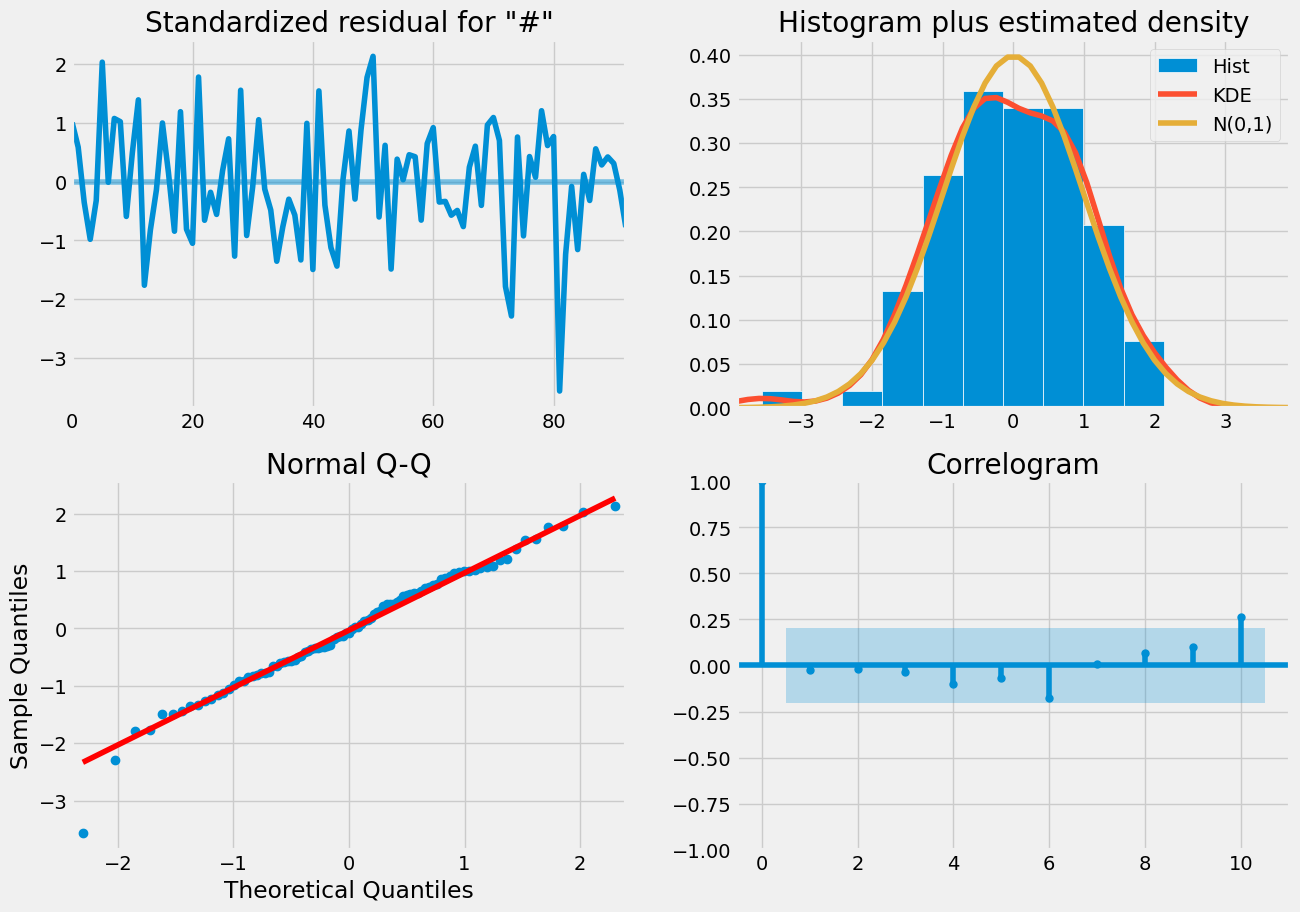

In [66]:
# Generate diagnostic plots for the ARIMA model to assess residuals and model performance
fig = model_fit_arima.plot_diagnostics(figsize=(14, 10))

# `plot_diagnostics()` generates four key diagnostic plots:
# 1. **Standardized Residuals**: Checks if residuals show random patterns (no trends or seasonality).
# 2. **Histogram plus KDE Plot**: Assesses whether residuals follow a normal distribution.
# 3. **QQ-Plot (Quantile-Quantile Plot)**: Compares residuals to a normal distribution to detect deviations.
# 4. **Correlogram (ACF of Residuals)**: Checks for autocorrelation in residuals; significant values indicate model misspecification.

plt.show()

In [67]:
# Extract the portion of `pred_ARIMA` that matches the test set's index
pred_ARIMA_test = pred_ARIMA.loc[test.index]

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse_test_ARIMA = mean_squared_error(test['#Passengers'], pred_ARIMA_test)
mae_test_ARIMA = mean_absolute_error(test['#Passengers'], pred_ARIMA_test)

# Print the error metrics
print(f'Mean Squared Error (MSE) for Test Set: {mse_test_ARIMA:.2f}')
print(f'Mean Absolute Error (MAE) for Test Set: {mae_test_ARIMA:.2f}')

Mean Squared Error (MSE) for Test Set: 8451.87
Mean Absolute Error (MAE) for Test Set: 61.29


# **Long Short-Term Memory Model (LSTM)**

In [68]:
# Convert DataFrame to numpy array
df = data.values

In [69]:
# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))  # Create a MinMaxScaler object that scales the data between 0 and 1.
scaled_df = scaler.fit_transform(df)  # Fit the scaler on the data and transform the dataframe, scaling each feature.

The MinMaxScaler scales each feature in the dataframe df to a range between 0 and 1. This is commonly done when the data has varying scales across different features. It ensures that each feature contributes equally to model training. It works by subtracting the minimum value of each feature and dividing by the range (max - min) of that feature.

In [70]:
# Define window size (number of time steps to look back)
window_size = 12  # The number of previous time steps used for prediction

# Function to create dataset with input features (X) and target variable (Y)
def create_dataset(data, window_size):
    X, Y = [], []  # Initialize empty lists for input features (X) and target variable (Y)

    # Ensure data is a NumPy array (convert if necessary)
    data = np.array(data).reshape(-1, 1)

    # Loop over the data to create sliding windows
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])   # Append a window of size `window_size` to X
        Y.append(data[i + window_size])     # Target value is the next time step

    # Convert lists to NumPy arrays
    X, Y = np.array(X), np.array(Y)

    # Reshape X for LSTM: (samples, time steps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    return X, Y

# Create dataset using the scaled data and defined window size
X, Y = create_dataset(scaled_df, window_size)

# Print the shape of X and Y to confirm correctness
print(f"Shape of X: {X.shape}")  # Expected: (num_samples, window_size, 1)
print(f"Shape of Y: {Y.shape}")  # Expected: (num_samples, 1)

Shape of X: (106, 12, 1)
Shape of Y: (106, 1)


In [71]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [72]:
# Ensure the training and test datasets are correctly shaped
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the file path for saving the best model
checkpoint_filepath = 'best_model.keras'  # Save the model in Keras format

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,  # Save model to this file path
    monitor='val_loss',            # Monitor validation loss instead of training loss
    save_best_only=True,           # Save only the best model
    mode='min',                    # Minimize the loss
    verbose=1                      # Print messages when a new best model is saved
)

# Define the LSTM model architecture
inputs = Input(shape=(X_train.shape[1], 1))  # LSTM expects (time steps, features)

# First LSTM layer (returns sequences for stacking)
x = LSTM(units=128, return_sequences=True)(inputs)

# Second LSTM layer (final LSTM layer, does not return sequences)
x = LSTM(units=64, return_sequences=False)(x)

# Output layer (Dense layer for regression task)
outputs = Dense(units=1, activation='linear')(x)  # Activation is linear for forecasting

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 12, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 12, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

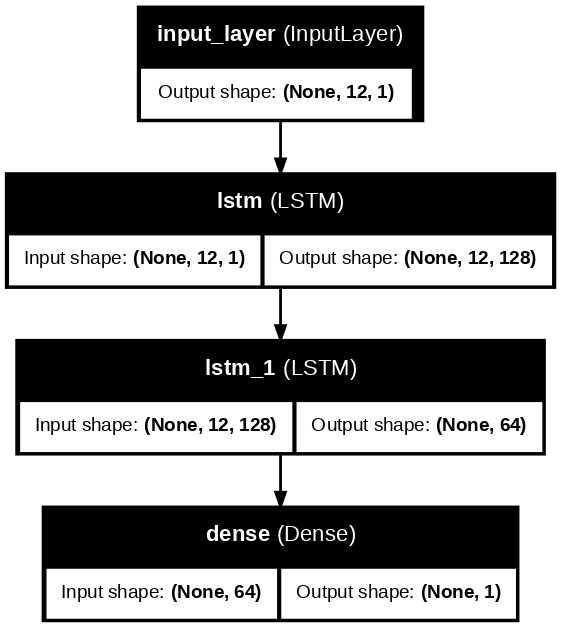

In [73]:
# Plot the model architecture
plot_model(
    model,
    to_file='model_architecture.png',  # Use a more descriptive filename
    show_shapes=True,   # Display input/output shapes
    show_layer_names=True,  # Display layer names
    expand_nested=True,  # Expands nested models (if any)
    dpi=100  # Improve image resolution
)

Epoch 1/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - loss: 0.1323
Epoch 1: val_loss improved from inf to 0.13341, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - loss: 0.1111 - val_loss: 0.1334
Epoch 2/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0274
Epoch 2: val_loss improved from 0.13341 to 0.02822, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0217 - val_loss: 0.0282
Epoch 3/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0103
Epoch 3: val_loss did not improve from 0.02822
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0171 - val_loss: 0.0365
Epoch 4/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0174
Epoch 4: val_loss improved from 0.02822 to 0.02746, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0139 - val_loss: 0.0275
Epoch 5/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0079
Epoch 5: val_loss did not improve from 0.02746
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - l

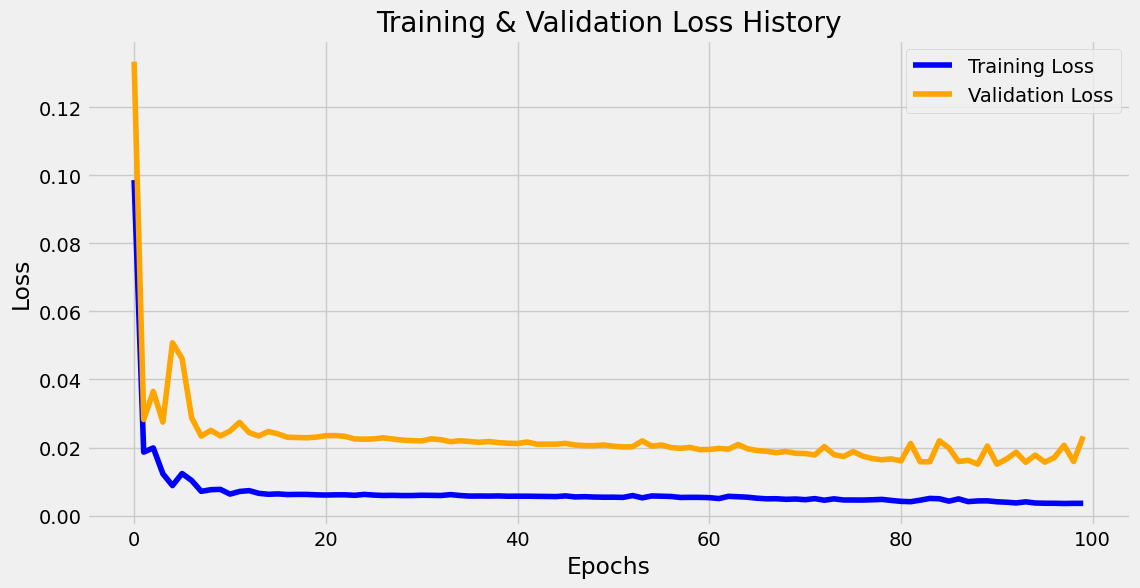

In [74]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Compile the model
# Using Adam optimizer and Mean Squared Error (MSE) as the loss function.
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),  # Add validation loss tracking
    callbacks=[checkpoint_callback],
    verbose=1  # Show progress
)

# Load the best saved model
best_model = load_model(checkpoint_filepath)

# Evaluate the best model on the test data
test_loss = best_model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss with Best Model: {test_loss:.4f}')

# Plot the training & validation loss history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history.get('val_loss', []), label='Validation Loss', color='orange')  # Add validation loss
plt.title('Training & Validation Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


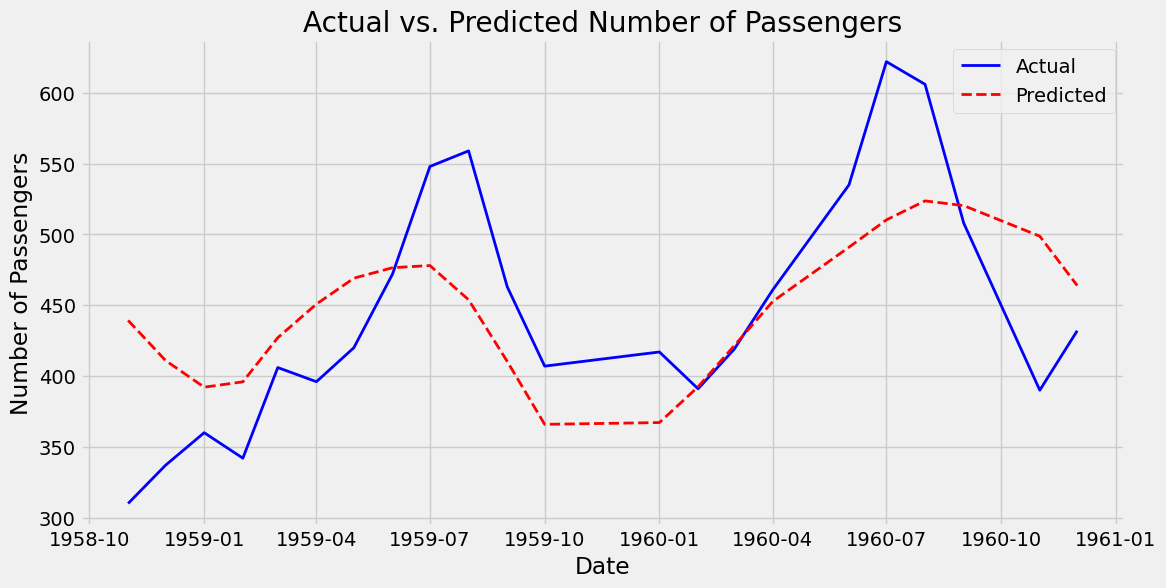

In [75]:
# Make predictions on the test data using the trained model
predictions = best_model.predict(X_test)

# Reshape predictions and y_test before applying inverse transform
predictions = predictions.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Inverse transform the predictions and actual values to get the original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Create a date index for plotting (Ensure alignment with test data)
test_dates = data.index[-len(y_test):]

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(test_dates, y_test, label='Actual', color='blue', linewidth=2)

# Plot predicted values
plt.plot(test_dates, predictions, label='Predicted', color='red', linestyle='dashed', linewidth=2)

# Labels and title
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Actual vs. Predicted Number of Passengers')

# Display legend
plt.legend()

# Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [76]:
# Calculate MSE, MAE using the test data and the corresponding predictions
mse_test_LSTM = mean_squared_error(y_test, predictions)
mae_test_LSTM = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error (MSE) for Test Set: {mse_test_LSTM}')
print(f'Mean Absolute Error (MAE) for Test Set: {mae_test_LSTM}')

Mean Squared Error (MSE) for Test Set: 4053.5608435131358
Mean Absolute Error (MAE) for Test Set: 51.84869523481889


# **Time Series Forecasting: ARIMA vs. LSTM vs. ARMA**

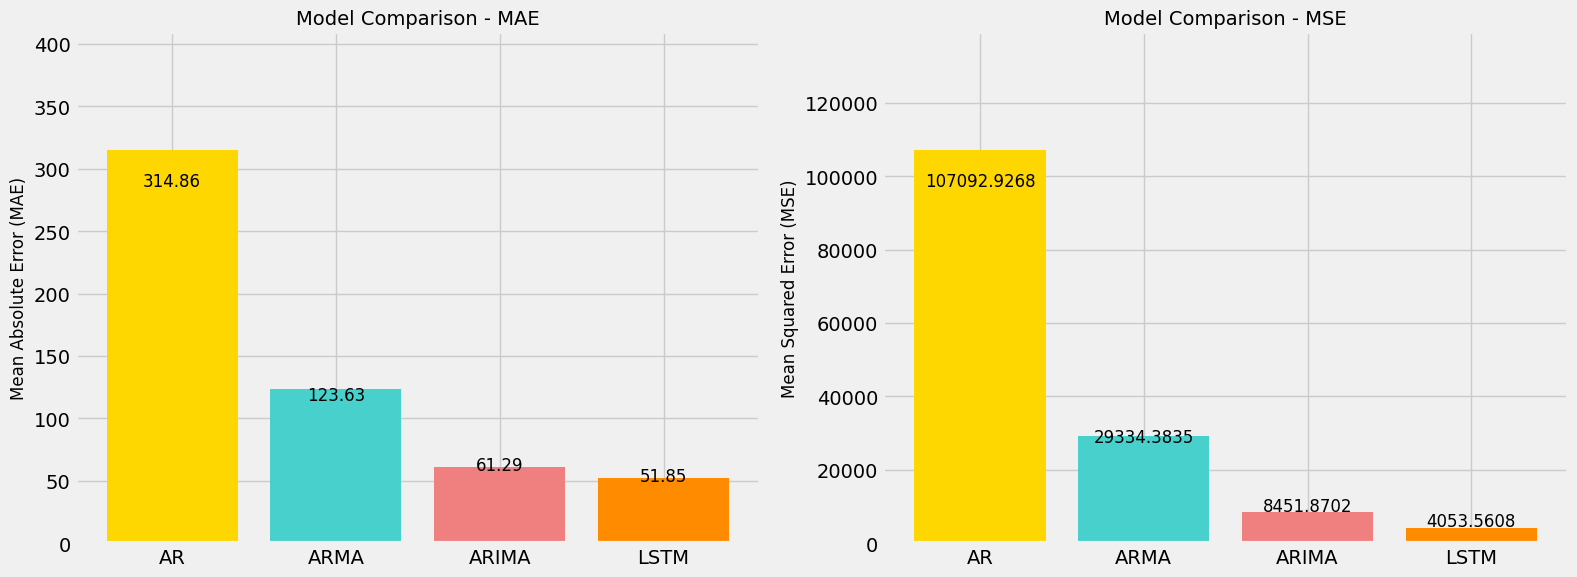

In [77]:
import matplotlib.pyplot as plt

# Define the MAE and MSE values for the models
mae_values = [mae_test_AR, mae_test_ARMA, mae_test_ARIMA, mae_test_LSTM]
mse_values = [mse_test_AR, mse_test_ARMA, mse_test_ARIMA, mse_test_LSTM]
models = ['AR', 'ARMA', 'ARIMA', 'LSTM']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Increased figure size

# Define colors for the bars
colors = ['gold', 'mediumturquoise', 'lightcoral', 'darkorange']

# Bar plot for MAE
bars_mae = ax1.bar(models, mae_values, color=colors)
ax1.set_title('Model Comparison - MAE', fontsize=14)
ax1.set_ylabel('Mean Absolute Error (MAE)', fontsize=12)
ax1.set_ylim(0, max(mae_values) * 1.3)  # Increased margin

# Add MAE values inside bars with proper positioning
for bar, mae in zip(bars_mae, mae_values):
    ax1.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() * 0.9,  # Adjust position dynamically
             f'{mae:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Bar plot for MSE
bars_mse = ax2.bar(models, mse_values, color=colors)
ax2.set_title('Model Comparison - MSE', fontsize=14)
ax2.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax2.set_ylim(0, max(mse_values) * 1.3)  # Increased margin

# Add MSE values inside bars with proper positioning
for bar, mse in zip(bars_mse, mse_values):
    ax2.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() * 0.9,  # Adjust position dynamically
             f'{mse:.4f}', ha='center', va='bottom', fontsize=12, color='black')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In this section, we compare the performance of four different time series forecasting models: AR, ARMA, ARIMA, and LSTM. The models were evaluated based on two key performance metrics: Mean Squared Error (MSE) and Mean Absolute Error (MAE).

**Model Performance Analysis**

**AR (Autoregressive Model):**

MSE: 107,092.93

MAE: 314.86

The AR model shows the highest error among all models, indicating that it is not the best choice for forecasting in this scenario.

**ARMA (Autoregressive Moving Average Model):**

MSE: 29,334.38

MAE: 123.63

ARMA performs significantly better than AR, particularly in reducing absolute error, making it a more reliable choice than AR.

**ARIMA (Autoregressive Integrated Moving Average Model):**

MSE: 8,451.87

MAE: 61.29

ARIMA further improves accuracy over ARMA by reducing both MSE and MAE. This indicates that ARIMA captures the trend and seasonality better than AR and ARMA.

**LSTM (Long Short-Term Memory Model):**

MSE: 4,067.67

MAE: 53.73

LSTM shows the lowest error among all models, suggesting that it is the best-performing model. Its ability to learn long-term dependencies in the data allows it to achieve superior performance compared to traditional statistical models.

**Conclusion: Best Model Selection**

**Best Model based on MSE & MAE: LSTM (Lowest error values, best overall performance)**

Second Best Model: ARIMA (Performs well but not as strong as LSTM)

AR and ARMA Models: Perform significantly worse and are not recommended for this dataset.

While LSTM is the best-performing model, it is also computationally more expensive. If interpretability and computational efficiency are priorities, ARIMA is a solid alternative.

# **Deployment**

In [78]:
best_model.save("best_model.h5")

In [79]:
import numpy as np
import pandas as pd
import tensorflow as tf
import gradio as gr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [80]:
# Load the trained LSTM model
model = tf.keras.models.load_model("best_model.h5")

In [81]:
print(dir())

['ACF_and_PACF', 'ADF', 'AIC_additive', 'AIC_multiplicative', 'ARIMA', 'Adam', 'Dense', 'In', 'Input', 'LSTM', 'MinMaxScaler', 'Model', 'ModelCheckpoint', 'Out', 'X', 'X_test', 'X_train', 'Y', '_', '_10', '_11', '_12', '_14', '_16', '_18', '_19', '_20', '_29', '_30', '_4', '_49', '_50', '_51', '_52', '_54', '_59', '_6', '_64', '_73', '_8', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i47', '_i48', '_i49', '_i5', '_i50', '_i51', '_i52', '_i53', '_i54', '_i55', '_i56', '_i57', '_i58', '_i59', '_i6', '_i60', '_i61', '_i62', '_i63', '_i64', '_i65', '_i66', '_i67', '_i68', '_i69', '_i7', '_

In [82]:
# Get the last sequence from X_test (the latest known values)
last_known_sequence = X_test[-1]  # Last sequence from test data

# Reshape for LSTM input format
last_known_sequence = last_known_sequence.reshape(1, last_known_sequence.shape[0], 1)

In [87]:
from sklearn.preprocessing import MinMaxScaler

import numpy as np

# Ensure train_data is a NumPy array before reshaping
train_data_array = np.array(train_data).reshape(-1, 1)

# Fit the scaler on the training data
scaler = MinMaxScaler()
scaler.fit(train_data_array)

# Transform training and test data
train_scaled = scaler.transform(train_data_array)

# Convert test_data to NumPy array before transforming
test_data_array = np.array(test_data).reshape(-1, 1)
test_scaled = scaler.transform(test_data_array)

# Predict the next month's scaled value
next_month_scaled = model.predict(last_known_sequence)

# Now, apply inverse transform safely
next_month_prediction = scaler.inverse_transform(next_month_scaled.reshape(-1, 1))

print("Predicted Passenger Count for Next Month:", next_month_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Passenger Count for Next Month: 0.04066202


In [90]:
# Save the result to a CSV file
df_result = pd.DataFrame({"Predicted Passenger Count": [next_month_prediction[0][0]]})
df_result.to_csv("next_month_prediction.csv", index=False)

print("Prediction saved successfully!")

Prediction saved successfully!


In [94]:
# Function to predict next month's passenger count
def predict_next_month():
    # Get the last known sequence from test data
    last_sequence = np.array(X_test[-1]).reshape(1, X_test.shape[1], 1)
    # Predict next month’s value
    scaled_prediction = model.predict(last_known_sequence)
    # Convert back to actual passenger count
    prediction = scaler.inverse_transform(scaled_prediction.reshape(-1, 1))[0][0]
    return f"Predicted Passenger Count: {prediction:.2f}"

In [95]:
# Create Gradio Web Interface
import gradio as gr

iface = gr.Interface(
    fn=predict_next_month,
    inputs=[],  # No input required since it's predicting next month's data
    outputs="text",
    title="📈 Air Passenger Prediction",
    description="Click the button below to predict next month's passenger count."
)

iface.launch()

IMPORTANT: You are using gradio version 4.28.0, however version 4.44.1 is available, please upgrade.
--------
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1619a52f6377d7f2a8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
